# Telecom Churn Case Study

### Business Problem Overview:
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another.<br />In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.<br />Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, __customer retention__ has now become even more important than customer acquisition.

### Business Objective
To reduce customer churn, i.e. to __predict which customers are at high risk of churn.__

### 1. Importing necessary libraries

In [244]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from scipy import stats

from datetime import datetime

from sklearn import model_selection, preprocessing,metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split,KFold,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score,roc_auc_score,classification_report,balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE 
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

### 2. Loading the data

In [245]:
original_dataset = pd.read_csv('telecom_churn_data.csv')
original_dataset.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [246]:
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300

In [247]:
telecom = original_dataset.copy()

In [248]:
# View the top five rows of the dataset
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [249]:
print(f"Shape of the dataframe: {telecom.shape}")

Shape of the dataframe: (99999, 226)


In [250]:
# Running .info() to better understand the data in the dataframe
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [251]:
pd.DataFrame(telecom.columns)

0
0               mobile_number
1                   circle_id
2              loc_og_t2o_mou
3              std_og_t2o_mou
4              loc_ic_t2o_mou
5        last_date_of_month_6
6        last_date_of_month_7
7        last_date_of_month_8
8        last_date_of_month_9
9                      arpu_6
10                     arpu_7
11                     arpu_8
12                     arpu_9
13                onnet_mou_6
14                onnet_mou_7
15                onnet_mou_8
16                onnet_mou_9
17               offnet_mou_6
18               offnet_mou_7
19               offnet_mou_8
20               offnet_mou_9
21              roam_ic_mou_6
22              roam_ic_mou_7
23              roam_ic_mou_8
24              roam_ic_mou_9
25              roam_og_mou_6
26              roam_og_mou_7
27              roam_og_mou_8
28              roam_og_mou_9
29           loc_og_t2t_mou_6
30           loc_og_t2t_mou_7
31           loc_og_t2t_mou_8
32           loc_og_t2t_mou_9
33           loc_og_t2m_mou_6
34           loc_og_t2m_mou_7
35           loc_og_t2m_mou_8
36           loc_og_t2m_mou_9
37           loc_og_t2f_mou_6
38           loc_og_t2f_mou_7
39           loc_og_t2f_mou_8
40           loc_og_t2f_mou_9
41           loc_og_t2c_mou_6
42           loc_og_t2c_mou_7
43           loc_og_t2c_mou_8
44           loc_og_t2c_mou_9
45               loc_og_mou_6
46               loc_og_mou_7
47               loc_og_mou_8
48               loc_og_mou_9
49           std_og_t2t_mou_6
50           std_og_t2t_mou_7
51           std_og_t2t_mou_8
52           std_og_t2t_mou_9
53           std_og_t2m_mou_6
54           std_og_t2m_mou_7
55           std_og_t2m_mou_8
56           std_og_t2m_mou_9
57           std_og_t2f_mou_6
58           std_og_t2f_mou_7
59           std_og_t2f_mou_8
60           std_og_t2f_mou_9
61           std_og_t2c_mou_6
62           std_og_t2c_mou_7
63           std_og_t2c_mou_8
64           std_og_t2c_mou_9
65               std_og_mou_6
66               std_og_mou_7
67               std_og_mou_8
68               std_og_mou_9
69               isd_og_mou_6
70               isd_og_mou_7
71               isd_og_mou_8
72               isd_og_mou_9
73               spl_og_mou_6
74               spl_og_mou_7
75               spl_og_mou_8
76               spl_og_mou_9
77                og_others_6
78                og_others_7
79                og_others_8
80                og_others_9
81             total_og_mou_6
82             total_og_mou_7
83             total_og_mou_8
84             total_og_mou_9
85           loc_ic_t2t_mou_6
86           loc_ic_t2t_mou_7
87           loc_ic_t2t_mou_8
88           loc_ic_t2t_mou_9
89           loc_ic_t2m_mou_6
90           loc_ic_t2m_mou_7
91           loc_ic_t2m_mou_8
92           loc_ic_t2m_mou_9
93           loc_ic_t2f_mou_6
94           loc_ic_t2f_mou_7
95           loc_ic_t2f_mou_8
96           loc_ic_t2f_mou_9
97               loc_ic_mou_6
98               loc_ic_mou_7
99               loc_ic_mou_8
100              loc_ic_mou_9
101          std_ic_t2t_mou_6
102          std_ic_t2t_mou_7
103          std_ic_t2t_mou_8
104          std_ic_t2t_mou_9
105          std_ic_t2m_mou_6
106          std_ic_t2m_mou_7
107          std_ic_t2m_mou_8
108          std_ic_t2m_mou_9
109          std_ic_t2f_mou_6
110          std_ic_t2f_mou_7
111          std_ic_t2f_mou_8
112          std_ic_t2f_mou_9
113          std_ic_t2o_mou_6
114          std_ic_t2o_mou_7
115          std_ic_t2o_mou_8
116          std_ic_t2o_mou_9
117              std_ic_mou_6
118              std_ic_mou_7
119              std_ic_mou_8
120              std_ic_mou_9
121            total_ic_mou_6
122            total_ic_mou_7
123            total_ic_mou_8
124            total_ic_mou_9
125              spl_ic_mou_6
126              spl_ic_mou_7
127              spl_ic_mou_8
128              spl_ic_mou_9
129              isd_ic_mou_6
130              isd_ic_mou_7
131              isd_ic_mou_8
132              isd_ic_mou_9
133     

### 3. Filtering High-Value customers
High-Value customers are filtered based on customers who have recharged more than or equal to the __$70^{th} percentile$__ of the average recharge amount in the first two months (the good phase).

In [252]:
# Replacing the null value with '0'
amt_list = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_data_6',
            'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
            'av_rech_amt_data_8']

In [253]:
telecom[amt_list] = telecom[amt_list].replace(np.nan, 0, regex=True)

In [254]:
telecom.shape

(99999, 226)

In [255]:
# Creating total amount for data
telecom['total_rech_amt_data_6'] = telecom.apply(lambda x: (x['total_rech_data_6'] * x['av_rech_amt_data_6']), axis=1)
telecom['total_rech_amt_data_7'] = telecom.apply(lambda x: (x['total_rech_data_7'] * x['av_rech_amt_data_7']), axis=1)

In [256]:
# Creating average amount for data and talktime recharge
telecom['av_rech_amt_6_7'] = telecom.apply(lambda x: ((x['total_rech_amt_6'] + x['total_rech_amt_7'] 
                                                       + x['total_rech_amt_data_6'] + x['total_rech_amt_data_7']) / 2)
                                           , axis=1)

In [257]:
telecom['av_rech_cut'] = pd.qcut(telecom['av_rech_amt_6_7'], 10, labels=False)

In [258]:
# Selecting records with average recharge amount more than or equal to the 70th percentile
high_value = telecom[telecom.av_rech_cut >= 7]
print(high_value.shape)
high_value.head()

(29953, 230)


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   
23            9/30/2014    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00    

In [259]:
# Dropping the columns created above
high_value.drop(['total_rech_amt_data_6', 'total_rech_amt_data_7', 'av_rech_amt_6_7', 'av_rech_cut'], axis=1, inplace=True)
high_value.shape

(29953, 226)

### 4. Tagging Churners and removing attributes of Churn Phase

The month of __Spetember__, is considered to be the __churn phase__.

Tagging the customers from the high_value dataframe as churn and non-churn.
- `1` signifies churn
- `0` signifies non-churn

The attributes used for tagging churns in the dataframe are:
- `total_ic_mou_9`
- `total_og_mou_9`
- `vol_2g_mb_9`
- `vol_3g_mb_9`

In [260]:
# Creating a 'churn' column and assigning '1' to customers which have no usage in the month of September
high_value.loc[(high_value['total_ic_mou_9'] == 0) &
               (high_value['total_og_mou_9'] == 0) &
               (high_value['vol_2g_mb_9'] == 0) &
               (high_value['vol_3g_mb_9'] == 0), 'churn'] = 1

# Replacing the NaN values in the churn column with '0'
high_value['churn'].fillna(0, inplace=True)

In [261]:
# Checking the churn rate
round(100 * (high_value['churn'].sum() / len(high_value.index)), 2)

8.12

#### Verifying that average revenue generated per user for the customers tagged as churn is zero or close to zero.

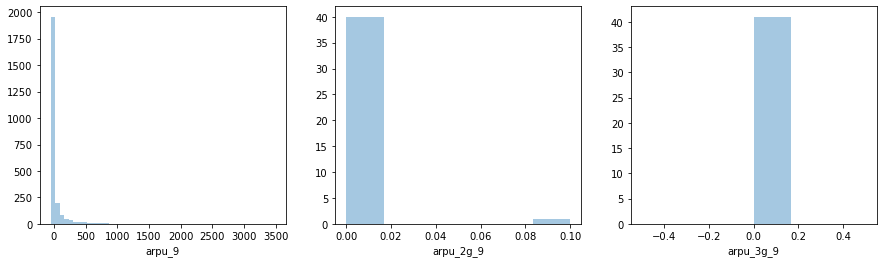

In [262]:
# Checking the average revenue per user for the churned customers
churned = high_value[high_value['churn'] == 1][['churn', 'arpu_9', 'arpu_2g_9', 'arpu_3g_9']]

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.distplot(churned['arpu_9'].dropna(), kde=False)
plt.subplot(1, 3, 2)
sns.distplot(churned['arpu_2g_9'].dropna(), kde=False)
plt.subplot(1, 3, 3)
sns.distplot(churned['arpu_3g_9'].dropna(), kde=False)
plt.show()

In [263]:
# Renaming some of the columns to better fit in with the naming convention
# of the columns in the dataframe
high_value.rename(columns={'jun_vbc_3g': 'vbc_3g_6',
                           'jul_vbc_3g': 'vbc_3g_7',
                           'aug_vbc_3g': 'vbc_3g_8',
                           'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

#### Removing the attributes that belong to the churn phase (september)

In [264]:
# Dropping columns that belong to the month of September
september = [col for col in high_value.columns if '_9' in col]
print(len(september))
september

55


['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [265]:
high_value.drop(columns=september, inplace=True)
high_value.shape

(29953, 172)

### 5. Data Cleaning

#### Dealing with missing values

In [266]:
# Dealing with null values
def null_percentages(df, threshold=20):
    """
        Returns the percentage of null values present in the dataframe,
        based on the threshold provided, with a floating point precision of 2
    """
    null_perc = round(100 * (df.isnull().sum() / len(df.index)), 2)
    return null_perc[null_perc > threshold]

In [267]:
null_percentages(high_value)

date_of_last_rech_data_6    44.11
date_of_last_rech_data_7    43.12
date_of_last_rech_data_8    46.80
max_rech_data_6             44.11
max_rech_data_7             43.12
max_rech_data_8             46.80
count_rech_2g_6             44.11
count_rech_2g_7             43.12
count_rech_2g_8             46.80
count_rech_3g_6             44.11
count_rech_3g_7             43.12
count_rech_3g_8             46.80
arpu_3g_6                   44.11
arpu_3g_7                   43.12
arpu_3g_8                   46.80
arpu_2g_6                   44.11
arpu_2g_7                   43.12
arpu_2g_8                   46.80
night_pck_user_6            44.11
night_pck_user_7            43.12
night_pck_user_8            46.80
fb_user_6                   44.11
fb_user_7                   43.12
fb_user_8                   46.80
dtype: float64

#### Based on the above output, it seems that a significant number of customers do not use internet services.

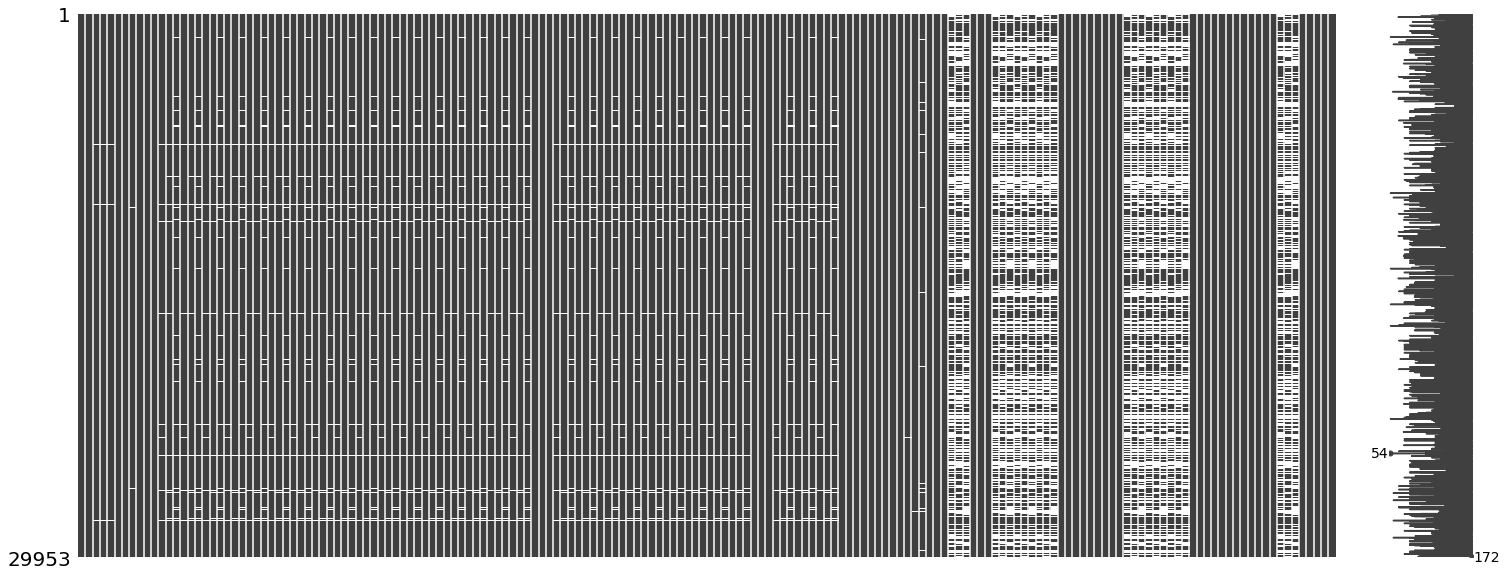

In [268]:
# Visualizing the null values in the dataset
msno.matrix(high_value)
plt.show()

#### Removing columns that contain a single value, as they provide no additional information

In [269]:
# Checking for categorical values that have a single value
high_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 172 entries, mobile_number to churn
dtypes: float64(136), int64(27), object(9)
memory usage: 39.5+ MB


In [270]:
single_val = high_value.nunique().sort_values()
single_val[single_val == 1]

std_ic_t2o_mou_6        1
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
std_ic_t2o_mou_8        1
std_og_t2c_mou_8        1
std_og_t2c_mou_7        1
std_og_t2c_mou_6        1
std_ic_t2o_mou_7        1
dtype: int64

In [271]:
# Creating a list containing column names of columns with a single value
single = list(single_val[single_val == 1].index)
print(len(single))
single

13


['std_ic_t2o_mou_6',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_ic_t2o_mou_8',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_6',
 'std_ic_t2o_mou_7']

In [272]:
# Viewing the data present in these columns
for col in single:
    print(f"{high_value[col].value_counts()}\n")

0.0    29411
Name: std_ic_t2o_mou_6, dtype: int64

109    29953
Name: circle_id, dtype: int64

0.0    29730
Name: loc_og_t2o_mou, dtype: int64

0.0    29730
Name: std_og_t2o_mou, dtype: int64

0.0    29730
Name: loc_ic_t2o_mou, dtype: int64

6/30/2014    29953
Name: last_date_of_month_6, dtype: int64

7/31/2014    29926
Name: last_date_of_month_7, dtype: int64

8/31/2014    29788
Name: last_date_of_month_8, dtype: int64

0.0    28781
Name: std_ic_t2o_mou_8, dtype: int64

0.0    28781
Name: std_og_t2c_mou_8, dtype: int64

0.0    29417
Name: std_og_t2c_mou_7, dtype: int64

0.0    29411
Name: std_og_t2c_mou_6, dtype: int64

0.0    29417
Name: std_ic_t2o_mou_7, dtype: int64



In [273]:
# Dropping the columns listed above and the mobile number column
single.append('mobile_number')
high_value.drop(columns=single, inplace=True)
print(high_value.shape)
high_value.head()

(29953, 158)


arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803          NaN          NaN         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0            NaN           NaN          0.00            NaN            NaN   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00            NaN            NaN           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

In [274]:
null_percentages(high_value, 0)

onnet_mou_6                  1.81
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.81
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.81
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.81
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.81
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.81
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_6             1.81
loc_og_t2f_mou_7             1.79
loc_og_t2f_mou_8             3.91
loc_og_t2c_mou_6             1.81
loc_og_t2c_mou_7             1.79
loc_og_t2c_mou_8             3.91
loc_og_mou_6                 1.81
loc_og_mou_7                 1.79
loc_og_mou_8                 3.91
std_og_t2t_mou_6             1.81
std_og_t2t_mou_7             1.79
std_og_t2t_mou

In [275]:
# Imputing missing values
night_pck = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']

In [276]:
print(f"{high_value['night_pck_user_6'].value_counts()}\n")
print(f"{high_value['night_pck_user_7'].value_counts()}\n")
print(f"{high_value['night_pck_user_8'].value_counts()}")

0.0    16333
1.0      407
Name: night_pck_user_6, dtype: int64

0.0    16663
1.0      375
Name: night_pck_user_7, dtype: int64

0.0    15594
1.0      341
Name: night_pck_user_8, dtype: int64


In [277]:
high_value[night_pck] = high_value[night_pck].fillna(value=0, axis=1)

In [278]:
fb_user = ['fb_user_6', 'fb_user_7', 'fb_user_8']

In [279]:
print(f"{high_value['fb_user_6'].value_counts()}\n")
print(f"{high_value['fb_user_7'].value_counts()}\n")
print(f"{high_value['fb_user_8'].value_counts()}")

1.0    15511
0.0     1229
Name: fb_user_6, dtype: int64

1.0    15705
0.0     1333
Name: fb_user_7, dtype: int64

1.0    14297
0.0     1638
Name: fb_user_8, dtype: int64


In [280]:
high_value[fb_user] = high_value[fb_user].fillna(value=0, axis=1)

In [281]:
monthly_2_3 = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
               'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']

In [282]:
for col in monthly_2_3:
    print(f"{high_value[col].value_counts()}\n")

0    25355
1     4012
2      551
3       28
4        7
Name: monthly_2g_6, dtype: int64

0    25204
1     4060
2      649
3       33
4        5
5        2
Name: monthly_2g_7, dtype: int64

0    25816
1     3727
2      370
3       30
4        8
5        2
Name: monthly_2g_8, dtype: int64

0     25295
1      3430
2       852
3       237
4        76
5        34
6        12
7         9
8         3
9         2
11        2
14        1
Name: monthly_3g_6, dtype: int64

0     25259
1      3293
2      1007
3       227
4        74
5        42
6        26
7        10
8         5
9         4
11        2
16        1
10        1
12        1
14        1
Name: monthly_3g_7, dtype: int64

0     25559
1      3132
2       883
3       224
4        91
5        32
6        14
7         9
8         3
9         3
10        2
16        1
Name: monthly_3g_8, dtype: int64



In [283]:
cat_cols = night_pck + fb_user + monthly_2_3
len(cat_cols)

12

In [284]:
# Dealing with continuous variables
c6 = [col for col in high_value.columns if '6' in col and 'date' not in col and col not in cat_cols]
c7 = [col for col in high_value.columns if '7' in col and 'date' not in col and col not in cat_cols]
c8 = [col for col in high_value.columns if '8' in col and 'date' not in col and col not in cat_cols]

In [285]:
print(f"C6: {len(c6)}, C7: {len(c7)}, C8: {len(c8)}")

C6: 46, C7: 46, C8: 46


In [286]:
high_value[c6] = high_value[c6].fillna(0)
high_value[c7] = high_value[c7].fillna(0)
high_value[c8] = high_value[c8].fillna(0)

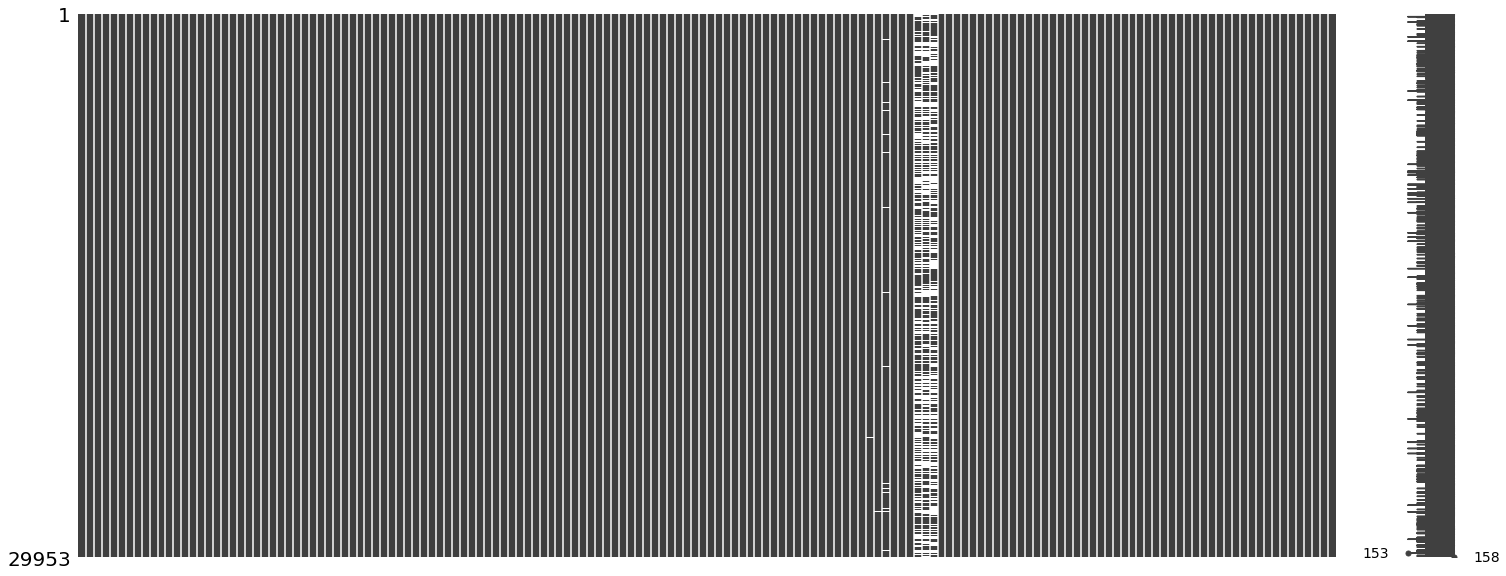

In [287]:
msno.matrix(high_value)
plt.show()

In [288]:
null_percentages(high_value, 0)

date_of_last_rech_6          0.24
date_of_last_rech_7          0.33
date_of_last_rech_8          1.94
date_of_last_rech_data_6    44.11
date_of_last_rech_data_7    43.12
date_of_last_rech_data_8    46.80
dtype: float64

### Dealing with outliers

In [289]:
# Dealing with outliers
high_value.describe([0.5, 0.75, 0.95, 0.98, 0.99, 0.998, 0.999])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean     558.820058    561.160547    508.890301    260.900880    268.051744   
std      460.868223    480.028497    502.136278    459.853278    480.303238   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
50%      482.354000    481.496000    427.604000     84.640000     82.830000   
75%      700.240000    698.829000    661.753000    290.490000    290.540000   
95%     1241.649400   1261.885600   1255.086400   1135.808000   1187.712000   
98%     1629.112640   1644.513880   1659.117880   1681.965200   1756.709200   
99%     1985.394360   1999.521120   1986.739600   2153.717600   2202.857600   
99.8%   3157.774648   3214.128192   3184.681912   3414.180880   3593.508800   
99.9%   3888.323616   4116.035304   3978.343672   4137.165120   4359.109600   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29953.000000  29953.000000  29953.000000  29953.000000   29953.000000   
mean     234.345252    373.800402    378.233106    335.123008      16.124001   
std      458.751242    482.712621    499.138982    481.985106      76.344227   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
50%       65.660000    222.560000    220.040000    182.840000       0.000000   
75%      240.630000    487.910000    494.030000    438.860000       0.000000   
95%     1075.384000   1256.662000   1272.430000   1167.620000      84.628000   
98%     1655.507600   1835.777200   1838.390000   1729.744400     212.688800   
99%     2159.676400   2330.358400   2411.139600   2191.731200     343.563200   
99.8%   3532.254160   3592.762720   3814.607200   3679.260320     733.536720   
99.9%   4169.950800   4176.140080   4547.757280   4473.025440     922.279120   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29953.000000   29953.000000   29953.000000   29953.000000   
mean       12.646145      12.512269      26.596033      20.155134   
std        75.833558      74.179181     116.274169      96.134144   
min         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
95%        55.640000      56.362000     145.562000     104.316000   
98%       158.270400     161.983600     347.133600     263.408000   
99%       281.194400     282.689200     531.348400     437.784000   
99.8%     711.436400     701.215520    1119.787760    1005.146320   
99.9%    1024.180480     918.464960    1459.016720    1245.134400   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29953.000000      29953.000000      29953.000000      29953.000000   
mean       19.889295         84.574122         85.762835         78.153334   
std       104.799622        228.962993        240.702116        227.540167   
min         0.000000          0.000000          0.000000          0.000000   
50%         0.000000         24.360000         24.680000         20.740000   
75%         0.000000         78.060000         78.510000         72.130000   
95%       100.692000        322.848000        324.650000        299.542000   
98%       254.088800        621.790000        625.356000        568.809200   
99%       427.068400       1006.729600       1019.034000        913.858000   
99.8%    1091.472000       2385.255440       2402.208320       2147.913680   
99.9%    1365.610640       3006.408000       3099.911520       2767.469520   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og

In [290]:
# Creating a dictionary to hold the quantile (99.8%) values for each of the columns
quant_dict = {}

num_cols = c6 + c7 + c8
for col in num_cols:
    quant_dict[col] = high_value[col].quantile(0.998)

In [291]:
# Removing outliers
for col in num_cols:
    high_value = high_value.loc[high_value[col] <= quant_dict[col]]
    
# Using describe to see the distribution in the cleaned dataframe
high_value.describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  26785.000000  26785.000000  26785.000000  26785.000000  26785.000000   
mean     518.149114    516.316137    464.673905    241.238538    245.671648   
std      321.193669    315.954106    340.188384    386.766866    395.457616   
min     -810.661000   -897.035000   -345.129000      0.000000      0.000000   
25%      301.509000    299.641000    222.382000     16.690000     15.360000   
50%      467.825000    466.177000    413.602000     83.040000     80.480000   
75%      666.850000    663.785000    628.430000    282.340000    282.190000   
90%      916.492400    911.608000    893.953800    717.790000    743.422000   
95%     1112.573800   1104.217600   1104.396400   1073.312000   1102.560000   
99%     1596.365680   1554.631360   1583.200560   1838.812800   1874.249200   
max     3036.592000   3023.875000   2970.528000   3346.580000   3159.580000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  26785.000000  26785.000000  26785.000000  26785.000000   26785.000000   
mean     212.563377    348.156365    349.286191    307.778541      12.751077   
std      369.439031    413.383528    418.787634    392.057866      50.829589   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        9.990000     68.430000     67.280000     44.260000       0.000000   
50%       63.580000    214.530000    211.310000    175.260000       0.000000   
75%      231.210000    469.580000    473.430000    419.580000       0.000000   
90%      630.508000    845.262000    863.964000    772.540000      25.002000   
95%      992.556000   1166.924000   1170.924000   1076.446000      73.684000   
99%     1824.028000   1985.680000   1994.896000   1879.596000     269.260000   
max     3200.340000   3588.580000   3769.710000   3620.390000     733.410000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   26785.000000   26785.000000   26785.000000   26785.000000   
mean        8.969585       9.241828      21.786500      15.517779   
std        42.101344      42.198739      83.438395      65.676513   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        12.206000      13.260000      46.140000      27.060000   
95%        46.328000      47.078000     132.384000      90.422000   
99%       207.484800     216.958800     447.330800     345.580400   
max       711.110000     700.940000    1118.630000    1001.160000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   26785.000000      26785.000000      26785.000000      26785.000000   
mean       15.272866         75.327270         75.412209         68.672631   
std        65.376493        162.955995        163.044816        148.610795   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.380000          4.590000          2.490000   
50%         0.000000         24.160000         24.580000         20.480000   
75%         0.000000         76.940000         76.680000         70.440000   
90%        24.974000        179.540000        183.970000        171.448000   
95%        89.072000        304.306000        303.840000        278.420000   
99%       331.850800        829.959600        819.024000        718.563200   
max      1023.990000       2384.090000       2386.090000       2090.030000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      26785.000000      26785.000000      26785.000000      26785.000000   
mean         154.833091        155.168279        144.351496          5.471845   
std          213.596473        209.079474        202.919272         14.399003   
min          

In [292]:
# Resetting the index of the dataframe
high_value.reset_index(drop=True, inplace=True)
high_value.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803         0.00         0.00         0.00   
1  378.721  492.223  137.362       413.69       351.03        35.08   
2  514.453  597.753  637.760       102.41       132.11        85.14   
3   74.350  193.897  366.966        48.96        50.66        33.58   
4  363.987  486.558  393.909       248.99       619.96       666.38   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00            0.0            0.0   
1         94.66         80.63        136.48            0.0            0.0   
2        757.93        896.68        983.39            0.0            0.0   
3         85.41         89.36        205.89            0.0            0.0   
4         88.86         50.58         97.81            0.0            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1            297.13            217.59             12.49             80.96   
2              4.48              6.16             23.34             91.81   
3             48.96             50.66             33.58             82.94   
4             29.88             17.33              9.48             33.76   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00               0.0   
1             70.58             50.54              0.00               0.0   
2             87.93            104.81              0.75               0.0   
3             83.01            148.56              0.00               0.0   
4             16.19             18.96              0.00               0.0   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1              0.00               0.0               0.0              7.15   
2              1.58               0.0               0.0              0.00   
3              0.00               0.0               0.0             17.71   
4              0.00               0.0               0.0              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        378.09        288.18         63.04            116.56   
2         97.04         94.09        129.74             97.93   
3        131.91        133.68        182.14              0.00   
4         63.64         33.53         28.44            219.11   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1            133.43             22.58             13.69             10.04   
2            125.94             61.79            665.36            808.74   
3              0.00              0.00              2.36              6.35   
4            602.63            656.89             55.09             34.38   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00               0.0               0.0               0.0   
1             75.69               0.0               0.0               0.0   
2            876.99               0.0               0.0               0.0   
3             39.61               0.0               0.0               0.0   
4             78.84               0.0               0.0               0.0   

   std_og_mou_6  

### 6. Creating Derived columns

In [293]:
columns_cat_trend = []

hv_diff = pd.DataFrame()

for col in range (0,len(c6)):
    new_col = c6[col][:-2] + '_diff'
    hv_diff[new_col] = high_value[c8[col]] - ((high_value[c6[col]] + high_value[c7[col]]) / 2)
    new_col_trend = c6[col][:-2] + '_trend'
    hv_diff[new_col_trend] = hv_diff[new_col].apply(lambda x: 1 if x >= 0 else 0)
    columns_cat_trend.append(new_col_trend)

In [294]:
print(hv_diff.shape)
hv_diff.head()

(26785, 92)


arpu_diff  arpu_trend  onnet_mou_diff  onnet_mou_trend  offnet_mou_diff  \
0     7.7025           1           0.000                1            0.000   
1  -298.1100           0        -347.280                0           48.835   
2    81.6570           1         -32.120                0          156.085   
3   232.8425           1         -16.230                0          118.505   
4   -31.3635           0         231.905                1           28.090   

   offnet_mou_trend  roam_ic_mou_diff  roam_ic_mou_trend  roam_og_mou_diff  \
0                 1               0.0                  1               0.0   
1                 1               0.0                  1               0.0   
2                 1               0.0                  1               0.0   
3                 1               0.0                  1               0.0   
4                 1               0.0                  1               0.0   

   roam_og_mou_trend  loc_og_t2t_mou_diff  loc_og_t2t_mou_trend  \
0                  1                0.000                     1   
1                  1             -244.870                     0   
2                  1               18.020                     1   
3                  1              -16.230                     0   
4                  1              -14.125                     0   

   loc_og_t2m_mou_diff  loc_og_t2m_mou_trend  loc_og_t2f_mou_diff  \
0                0.000                     1                0.000   
1              -25.230                     0                0.000   
2               14.940                     1                1.205   
3               65.585                     1                0.000   
4               -6.015                     0                0.000   

   loc_og_t2f_mou_trend  loc_og_t2c_mou_diff  loc_og_t2c_mou_trend  \
0                     1                 0.00                     1   
1                     1                 7.15                     1   
2                     1                 0.00                     1   
3                     1                17.71                     1   
4                     1                 0.00                     1   

   loc_og_mou_diff  loc_og_mou_trend  std_og_t2t_mou_diff  \
0            0.000                 1                0.000   
1         -270.095                 0             -102.415   
2           34.175                 1              -50.145   
3           49.345                 1                0.000   
4          -20.145                 0              246.020   

   std_og_t2t_mou_trend  std_og_t2m_mou_diff  std_og_t2m_mou_trend  \
0                     1                0.000                     1   
1                     0               63.825                     1   
2                     0              139.940                     1   
3                     1               35.255                     1   
4                     1               34.105                     1   

   std_og_t2f_mou_diff  std_og_t2f_mou_trend  std_og_mou_diff  \
0                  0.0                     1            0.000   
1                  0.0                     1          -38.590   
2                  0.0                     1           89.800   
3                  0.0                     1           35.255   
4                  0.0                     1          280.130   

   std_og_mou_trend  isd_og_mou_diff  isd_og_mou_trend  spl_og_mou_diff  \
0                 1            0.000                 1             0.00   
1                 0            0.000                 1            10.23   
2                 1            0.000                 1             0.00   
3                 1           -0.005                 0            17.66   
4                 1            0.000                 1             0.00   

   spl_og_mou_trend  og_others_diff  og_others_trend  total_og_mou_diff  \
0                 1             0.0                1              0.000   
1                 1             0.0           

#### Creating recency columns for the recharge date

In [295]:
date_cols = [col for col in high_value.columns if 'date' in col]
high_value[date_cols] = high_value[date_cols].apply(pd.to_datetime)

In [296]:
# Using end of action phase for getting the recency of the good phase
high_value['date_of_last_rech_good_phase'] = high_value[['date_of_last_rech_6', 'date_of_last_rech_6']].max(axis=1)
high_value['rec_good_phase'] = ((datetime(2014, 8, 31) - high_value['date_of_last_rech_good_phase']).dt.days)

In [297]:
# Dealing with the missing values in the derived recency (good phase) column
high_value['rec_good_phase'].isnull().sum()

63

In [298]:
# Imputing the missing values with the help of first day of the good phase
high_value['rec_good_phase'].fillna((datetime(2014, 8, 31) - datetime(2014, 6, 1)).days, inplace=True)
high_value['rec_good_phase'].isnull().sum()

0

In [299]:
# Creating recency column for the action phase
high_value['rec_action_phase'] = ((datetime(2014, 8, 31) - high_value['date_of_last_rech_8']).dt.days)

# Dealing with the missing values in the derived recency (action phase) column
high_value['rec_action_phase'].isnull().sum()

518

In [300]:
# Using the last date of recharge from good phase to impute the missing values in the action phase
high_value['rec_action_phase'].fillna(high_value['rec_good_phase'], inplace=True)
high_value['rec_action_phase'].isnull().sum()

0

In [301]:
# Creating recency columns for the data recharge date
high_value['date_of_last_data_rech_good_phase'] = high_value[['date_of_last_rech_data_6', 'date_of_last_rech_data_7']].max(axis=1)

# Using end of action phase for getting the recency of the good phase
high_value['rec_data_good_phase'] = ((datetime(2014, 8, 31) - high_value['date_of_last_data_rech_good_phase']).dt.days)

# Dealing with the missing values in the derived recency (good phase) column
high_value['rec_data_good_phase'].isnull().sum()

9300

In [302]:
# Imputing the missing values with the help of first day of the good phase
high_value['rec_data_good_phase'].fillna((datetime(2014, 8, 31) - datetime(2014, 6, 1)).days, inplace=True)
high_value['rec_data_good_phase'].isnull().sum()

0

In [303]:
# Creating recency column for the action phase
high_value['rec_data_action_phase'] = ((datetime(2014, 8, 31) - high_value['date_of_last_rech_data_8']).dt.days)

# Dealing with the missing values in the derived recency (action phase) column
high_value['rec_data_action_phase'].isnull().sum()

12544

In [304]:
# Using the last date of recharge from good phase to impute the missing values in the action phase
high_value['rec_data_action_phase'].fillna(high_value['rec_data_good_phase'], inplace=True)
high_value['rec_data_action_phase'].isnull().sum()

0

In [305]:
null_percentages(high_value, 0)

date_of_last_rech_6                   0.24
date_of_last_rech_7                   0.28
date_of_last_rech_8                   1.93
date_of_last_rech_data_6             43.86
date_of_last_rech_data_7             42.92
date_of_last_rech_data_8             46.83
date_of_last_rech_good_phase          0.24
date_of_last_data_rech_good_phase    34.72
dtype: float64

In [306]:
print(high_value.shape)
date_cols = date_cols + ['date_of_last_rech_good_phase', 'date_of_last_data_rech_good_phase']
print(len(date_cols))
date_cols

(26785, 164)
8


['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_good_phase',
 'date_of_last_data_rech_good_phase']

In [307]:
# Dropping the original date columns as we have derived matrices from them
high_value.drop(columns=date_cols, inplace=True)
high_value.shape

(26785, 156)

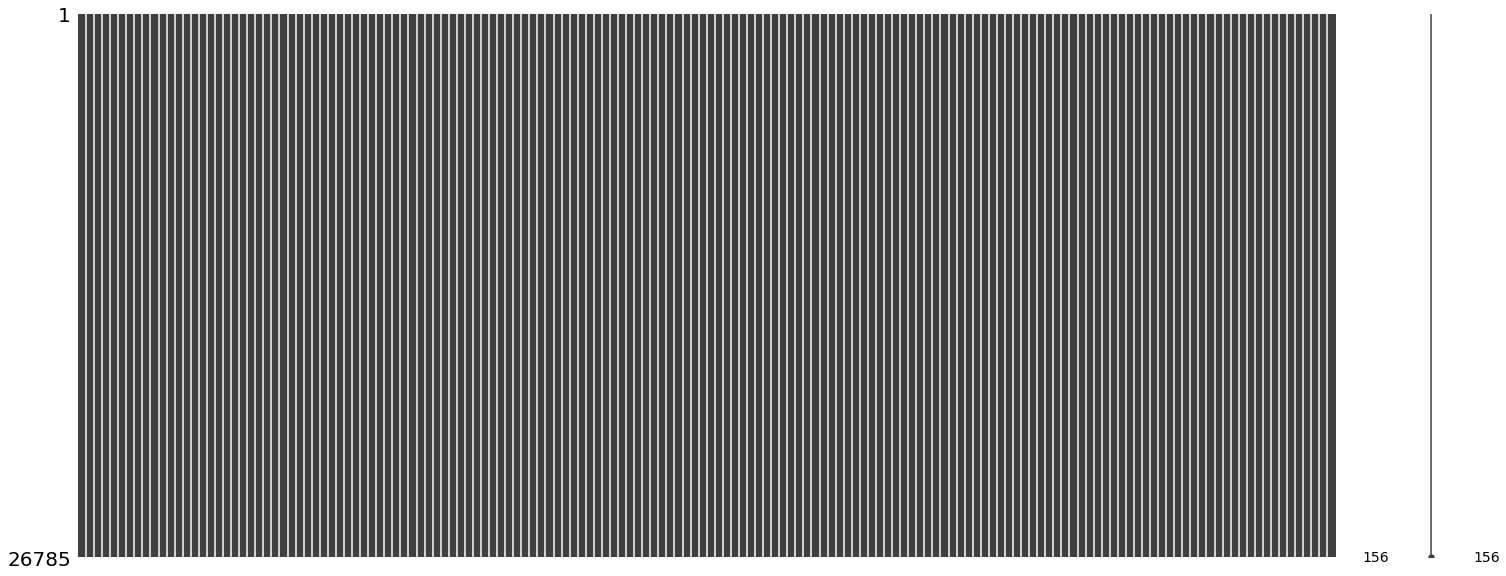

In [308]:
msno.matrix(high_value)
plt.show()

#### Creating behavioural variables

In [309]:
# night_pck
high_value['night_pck'] = high_value['night_pck_user_8'] - ((high_value['night_pck_user_6'] + high_value['night_pck_user_7']) / 2)

# value < 0 -> Decrease in usage
# value = 0 -> No change
# value > 0 -> Increase in usage
high_value['night_pck'] = high_value['night_pck'].apply(lambda x: -1 if x < 0 else 1 if x > 0 else 0)

high_value['night_pck'].value_counts()

 0    26310
-1      310
 1      165
Name: night_pck, dtype: int64

In [310]:
# fb_user
high_value['fb_user'] = high_value['fb_user_8'] - ((high_value['fb_user_6'] + high_value['fb_user_7']) / 2)

# value < 0 -> Decrease in usage
# value = 0 -> No change
# value > 0 -> Increase in usage
high_value['fb_user'] = high_value['fb_user'].apply(lambda x: -1 if x < 0 else 1 if x > 0 else 0)

high_value['fb_user'].value_counts()

 0    20042
-1     4016
 1     2727
Name: fb_user, dtype: int64

In [311]:
# monthly_2g
high_value['monthly_2g'] = high_value['monthly_2g_8'] - ((high_value['monthly_2g_6'] - high_value['monthly_2g_7']) / 2)

# value < 0 -> Decrease in usage
# value = 0 -> No change
# value > 0 -> Increase in usage
high_value['monthly_2g'] = high_value['monthly_2g'].apply(lambda x: -1 if x < 0 else 1 if x > 0 else 0)

high_value['monthly_2g'].value_counts()

 0    20925
 1     4749
-1     1111
Name: monthly_2g, dtype: int64

In [312]:
# monthly_3g
high_value['monthly_3g'] = high_value['monthly_3g_8'] - ((high_value['monthly_3g_6'] - high_value['monthly_3g_7']) / 2)

# value < 0 -> Decrease in usage
# value = 0 -> No change
# value > 0 -> Increase in usage
high_value['monthly_3g'] = high_value['monthly_3g'].apply(lambda x: -1 if x < 0 else 1 if x > 0 else 0)

high_value['monthly_3g'].value_counts()

 0    21097
 1     4578
-1     1110
Name: monthly_3g, dtype: int64

In [313]:
high_value.drop(columns=cat_cols, inplace=True)
high_value.shape

(26785, 148)

In [314]:
high_value.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803         0.00         0.00         0.00   
1  378.721  492.223  137.362       413.69       351.03        35.08   
2  514.453  597.753  637.760       102.41       132.11        85.14   
3   74.350  193.897  366.966        48.96        50.66        33.58   
4  363.987  486.558  393.909       248.99       619.96       666.38   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00            0.0            0.0   
1         94.66         80.63        136.48            0.0            0.0   
2        757.93        896.68        983.39            0.0            0.0   
3         85.41         89.36        205.89            0.0            0.0   
4         88.86         50.58         97.81            0.0            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1            297.13            217.59             12.49             80.96   
2              4.48              6.16             23.34             91.81   
3             48.96             50.66             33.58             82.94   
4             29.88             17.33              9.48             33.76   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00               0.0   
1             70.58             50.54              0.00               0.0   
2             87.93            104.81              0.75               0.0   
3             83.01            148.56              0.00               0.0   
4             16.19             18.96              0.00               0.0   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1              0.00               0.0               0.0              7.15   
2              1.58               0.0               0.0              0.00   
3              0.00               0.0               0.0             17.71   
4              0.00               0.0               0.0              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        378.09        288.18         63.04            116.56   
2         97.04         94.09        129.74             97.93   
3        131.91        133.68        182.14              0.00   
4         63.64         33.53         28.44            219.11   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1            133.43             22.58             13.69             10.04   
2            125.94             61.79            665.36            808.74   
3              0.00              0.00              2.36              6.35   
4            602.63            656.89             55.09             34.38   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00               0.0               0.0               0.0   
1             75.69               0.0               0.0               0.0   
2            876.99               0.0               0.0               0.0   
3             39.61               0.0               0.0               0.0   
4             78.84               0.0               0.0               0.0   

   std_og_mou_6  

#### Creating some common functions

In [315]:
def dist_prob_plot(feature_name):
    """
        Plot the distribution and the probability of the features passed
        params `feature_name`: Names of features to be plotted
        return: Plots for distribution and probability
    """
    
    plt.figure(figsize=(25, 4))
    
    # 6th Month
    plt.subplot(1, 6, 1)
    sns.distplot(high_value[feature_name] ,kde=False, fit=stats.norm)
    plt.title(f"{feature_name} -> Distribution plot")
    plt.subplot(1, 6, 2)
    _ = stats.probplot(high_value[feature_name], plot=plt)
    plt.title(f"{feature_name} -> Probability plot")
    
    # 7th Month
    new_f = feature_name[:-2] + '_7'
    plt.subplot(1, 6, 3)
    sns.distplot(high_value[new_f], kde=False, fit=stats.norm)
    plt.title(f"{new_f} -> Distribution plot")
    plt.subplot(1, 6, 4)
    _ = stats.probplot(high_value[new_f], plot=plt)
    plt.title(f"{new_f} -> Probability plot")
    
    # 8th Month
    new_f = feature_name[:-2] + '_8'
    plt.subplot(1, 6, 5)
    sns.distplot(high_value[new_f], kde=False, fit=stats.norm)
    plt.title(f"{new_f} -> Distribution plot")
    plt.subplot(1, 6, 6)
    _ = stats.probplot(high_value[new_f], plot=plt)
    plt.title(f"{new_f} -> Probability plot")
    
    plt.tight_layout()
    plt.show()    

In [316]:
def mscatterplot(df, x_colname, y_colname, hue_colname, pltnum, listlen):
    """
        Creates scatterplots for all the columns provided for a dataframe
        params `df`: Name of the dataframe
        params `x_colname`: Name of the column that lies on X-axis
        params `y_colname`: Name of the column that lies on y-axis
        params `hue_colname`: Name of the column that will act as the hue for the plot
        params `pltnum`: Number of the plot
        params `listlen`: Total length of the list
        returns: None
    """
    
    coln = 5
    rown = listlen // coln + 1
    plt.subplot(rown, coln, pltnum)
    sns.scatterplot(x=x_colname, y=y_colname, hue=hue_colname, data=df)
    plt.xticks(rotation=45)

In [317]:
def model_evaluation_plot(y_train,y_train_pred,y_test,y_test_pred):
    """
        Function for evaluation of the model based on 
        params `y_train`: Actual values of the training set
        params `y_train_ped`: Predicted values of the training set
        params `y_test`: Actual values of the test set
        params `y_test_pred` : Predicted values of the test set
        returns: None
    """
    
    print("\n____________Recall/Sensitivity (Churn Prediction Accuracy) score____________")
    print(f"Train set: {round(recall_score(y_train, y_train_pred), 3)}")
    print(f"Test set: {round(recall_score(y_test, y_test_pred), 3)}")

    print('\n____________Specificity (Non Churn Prediction Accuracy) score____________')
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_train_pred).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_test_pred).ravel()
    print(f"Train set: {round((tn1 / (tn1 + fp1)), 3)}")
    print(f"Test set: {round((tn2 / (tn2 + fp2)), 3)}")
        
    print('\n____________Precision score____________')
    print(f"Train set: {round(precision_score(y_train, y_train_pred), 3)}")
    print(f"Test set: {round(precision_score(y_test, y_test_pred), 3)}")
    
    print('\n____________F1 score____________')
    print(f"Train set: {round(f1_score(y_train, y_train_pred), 3)}")
    print(f"Test set: {round(f1_score(y_test, y_test_pred), 3)}")
    
    print('\n____________Accuracy score____________')
    print(f"Train set: {round(accuracy_score(y_train, y_train_pred), 3)}")
    print(f"Test set: {round(accuracy_score(y_test, y_test_pred), 3)}")
    
    print('\n____________Confusion Matrix____________')
    plt.figure(figsize=(8, 2))
    
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(y_train, y_train_pred, normalize='true'), annot=True, cbar=False)
    plt.ylabel('Actual churn')   
    plt.xlabel('Predicted churn')
    plt.title('Training set')
    
    plt.subplot(1,2,2)
    sns.heatmap(confusion_matrix(y_test, y_test_pred, normalize='true'), annot=True, cbar=False)
    plt.ylabel('Actual churn')   
    plt.xlabel('Predicted churn')
    plt.title('Test set')

### 7. Data Visualization (EDA)

#### - Churn Rate

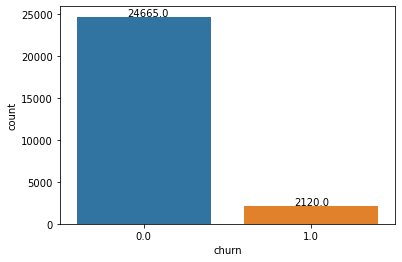

In [318]:
ax = sns.countplot(x=high_value['churn'])

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

plt.show()

From the plot above, it is clear that churn rate has class imbalance.

#### - Average revenue per user (arpu)

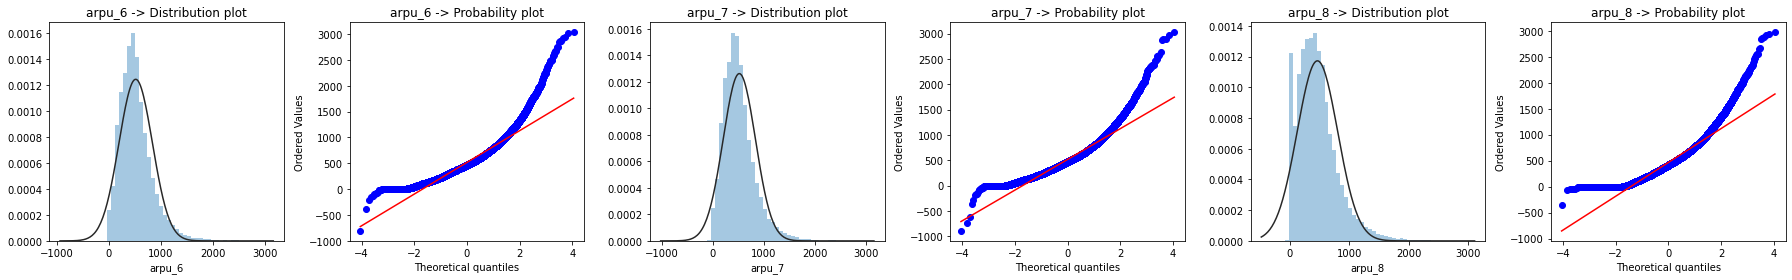

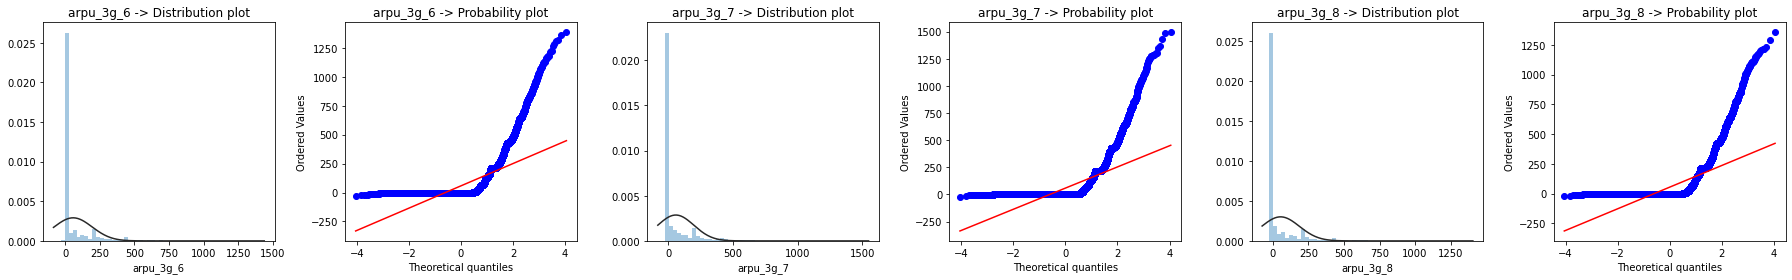

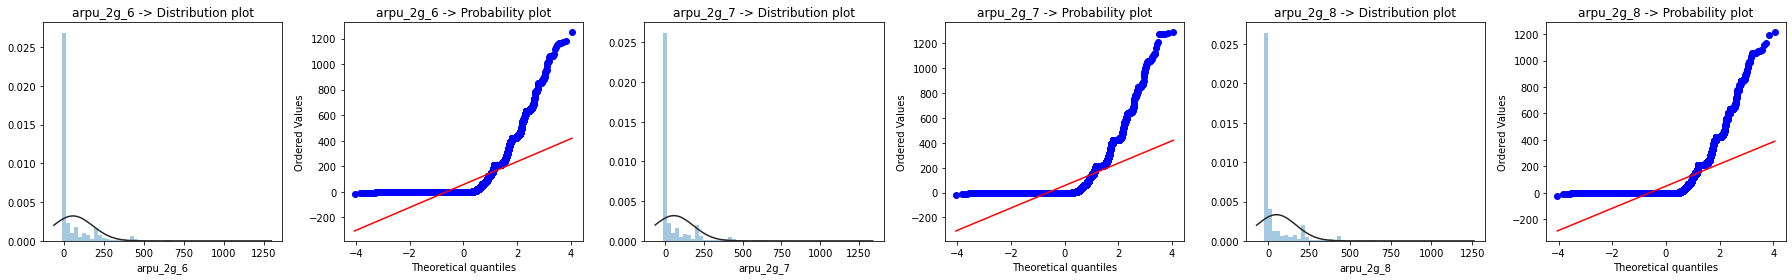

In [319]:
cols_arpu = [col for col in high_value.columns if ('arpu' in col and '6' in col)]

for f in cols_arpu:
    dist_prob_plot(f)

#### - Recharge amount

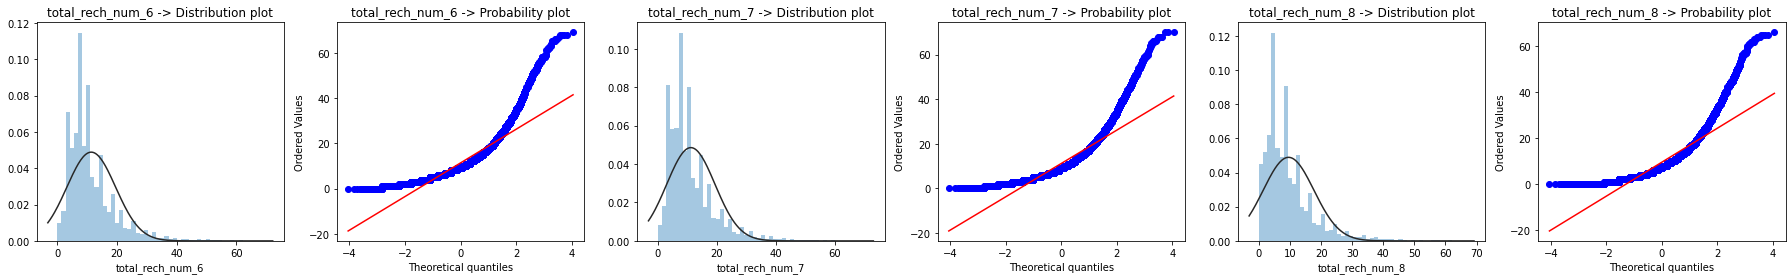

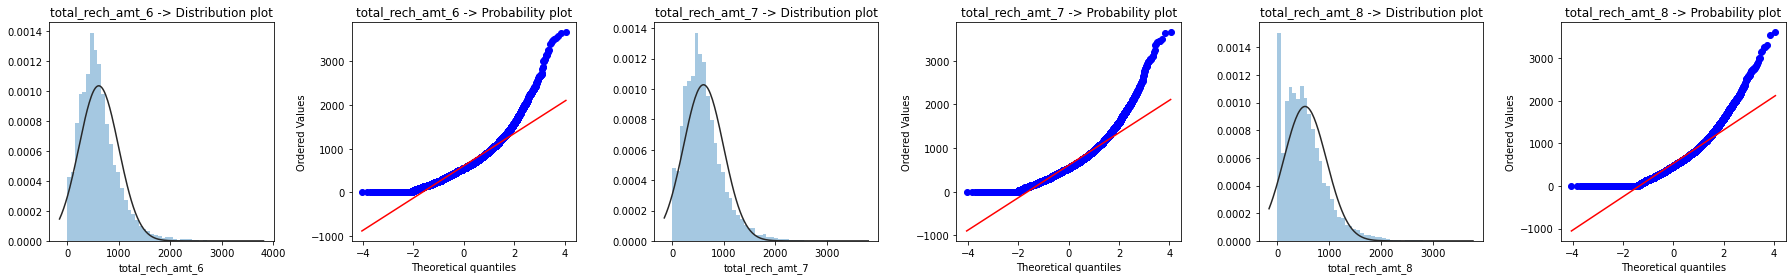

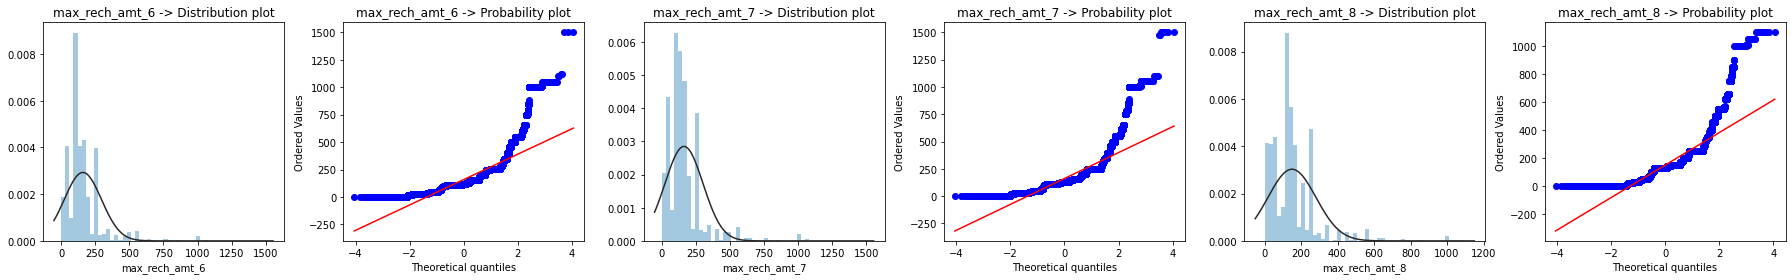

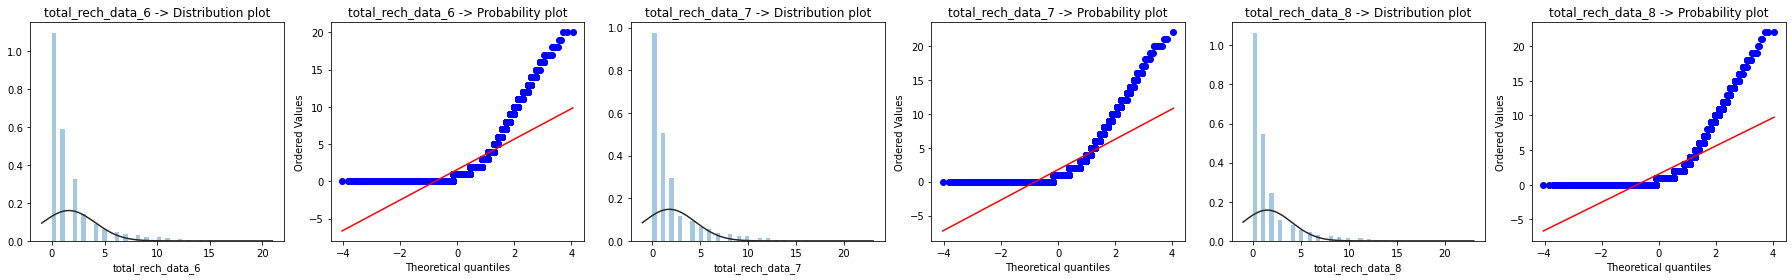

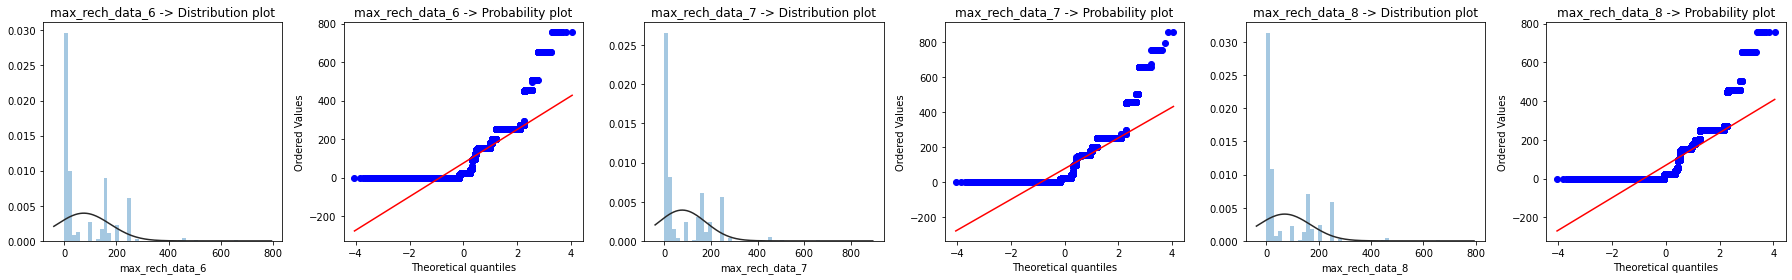

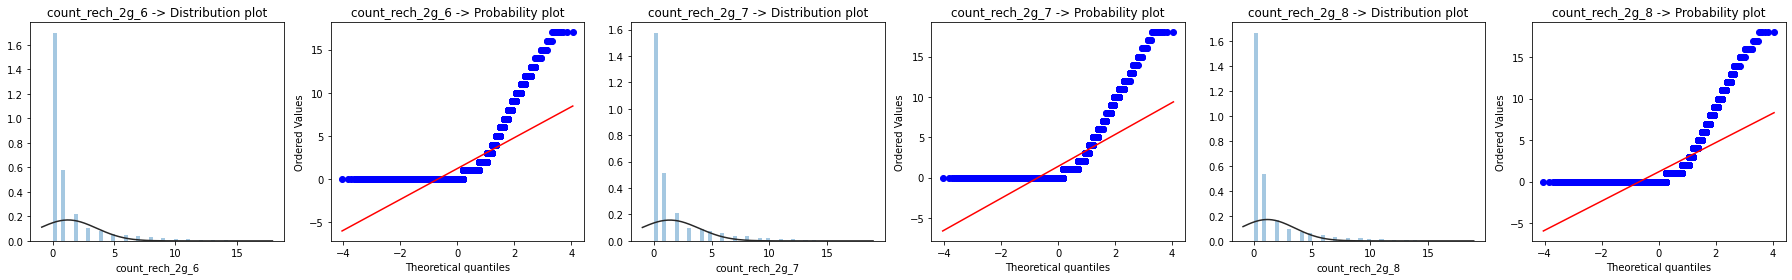

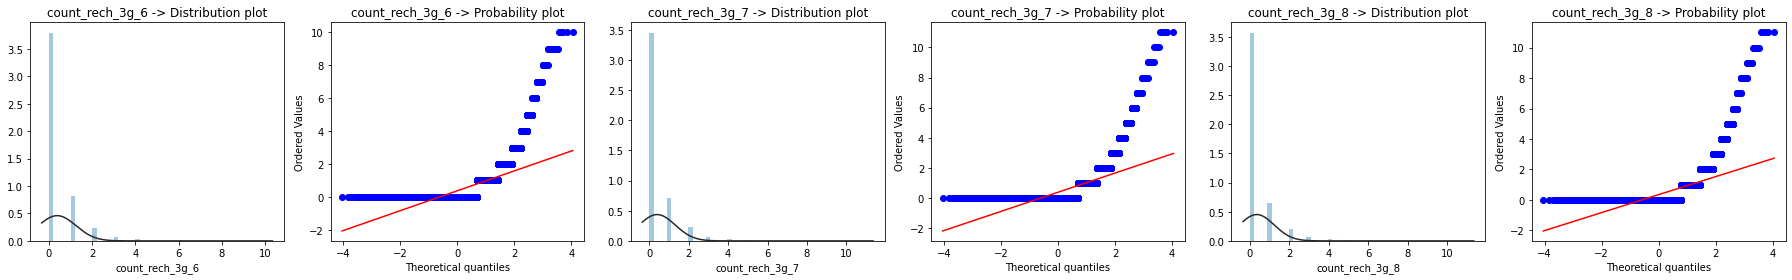

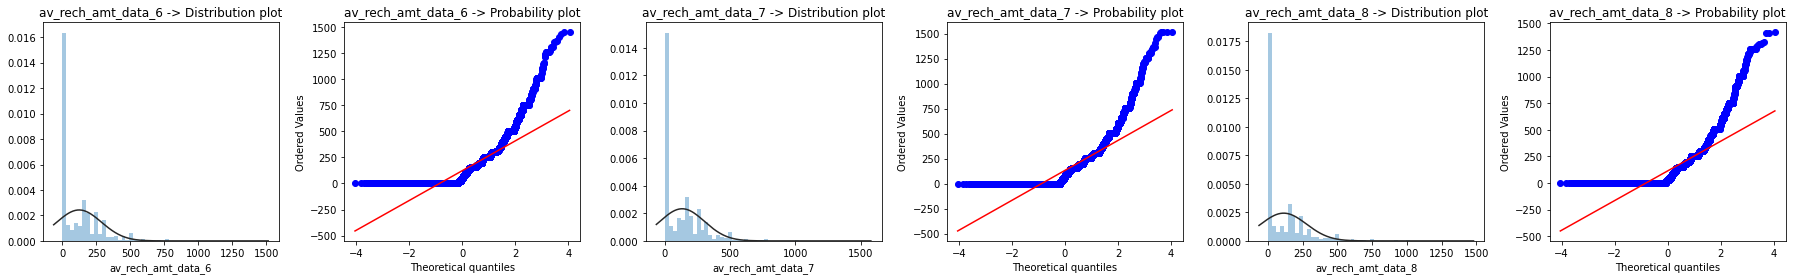

In [320]:
cols_rech = [col for col in high_value.columns if ('rech' in col and '6' in col and 'date' not in col)]

for f in cols_rech:
    dist_prob_plot(f)

#### - Miscellaneous features

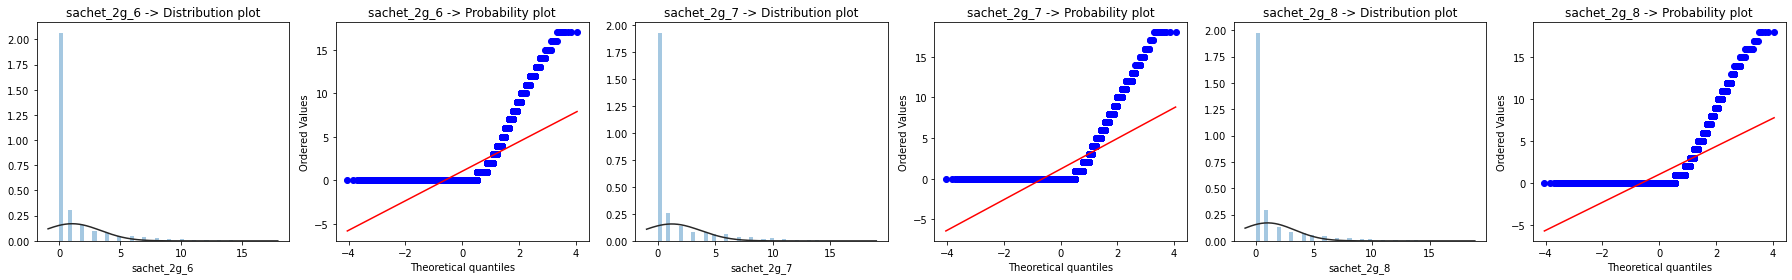

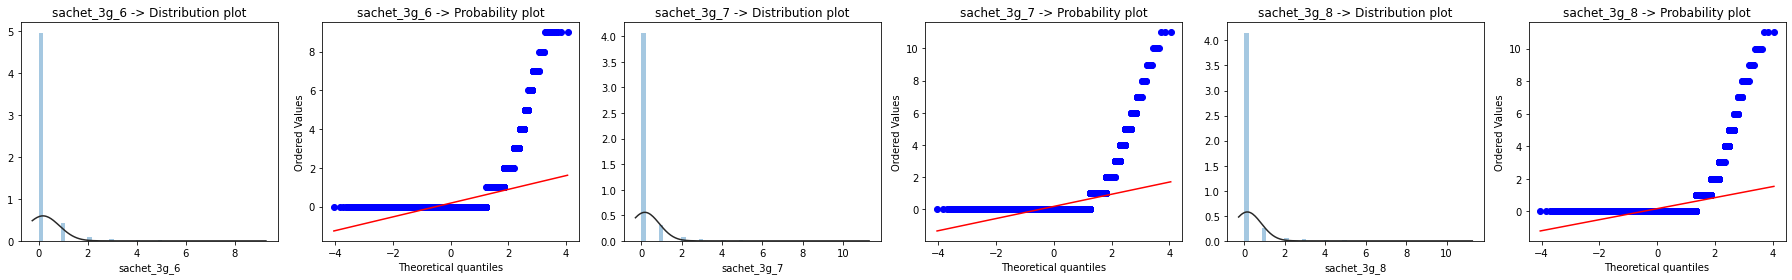

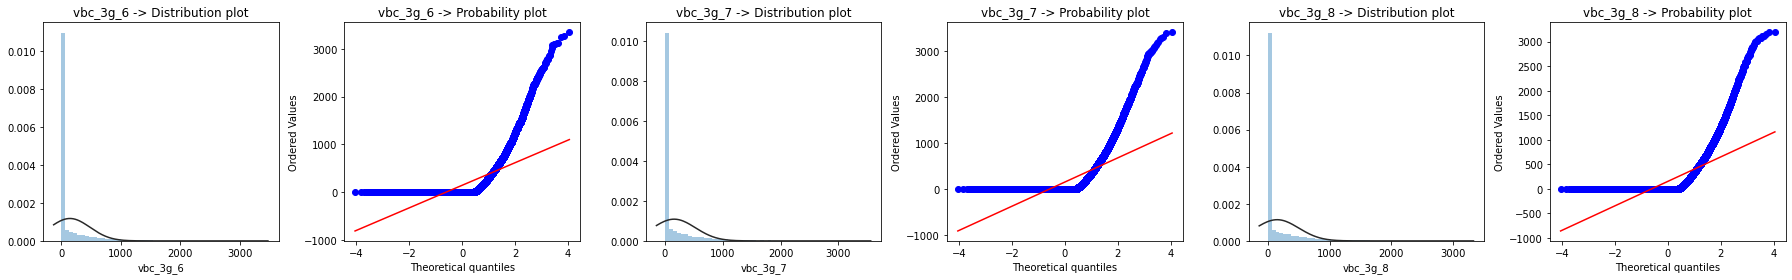

In [321]:
cols_misc = [col for col in high_value.columns if (('night' in col or 'sachet' in col or 'vbc' in col) and '6' in col)]

for f in cols_misc:
    dist_prob_plot(f)

#### - Age on Network (aon)

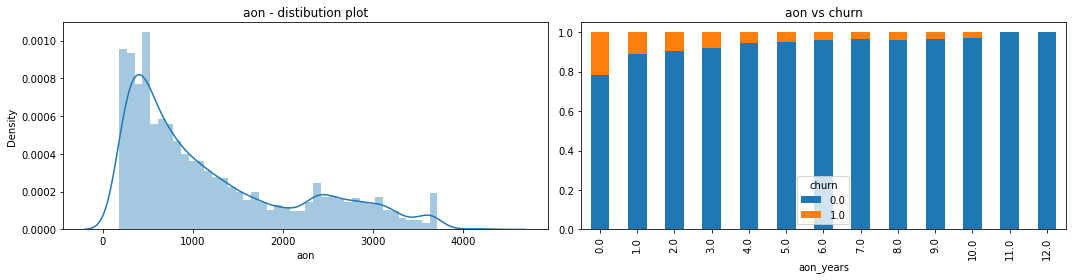

In [322]:
# As 'aon' (Age on Network) is number of days, converting it into years for better analysis.
# Rounding off to nearest year number
high_value['aon_years'] = round(high_value['aon'] / (30 * 12))

# Ploting the data
plt.figure(figsize=(15, 4))
ax1 = plt.subplot(1, 2, 1)
sns.distplot(high_value['aon'], label='aon - distribution plot', ax=ax1)
plt.title('aon - distibution plot')
ax2 = plt.subplot(1, 2, 2)
pd.crosstab(high_value.aon_years, high_value.churn, normalize='index').plot(kind='bar', title='aon vs churn', ax=ax2, stacked=True)
plt.tight_layout()
plt.show()

high_value.drop(columns='aon_years',inplace=True)

#### - Usage trend

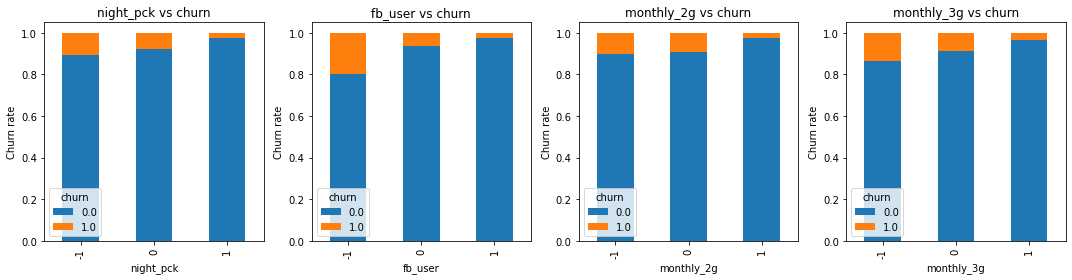

In [323]:
plt.figure(figsize=(15, 4))
ax1 = plt.subplot(1, 4, 1)
plt.xlabel('Usage trend')
plt.ylabel('Churn rate')
pd.crosstab(high_value.night_pck, high_value.churn, normalize='index').plot(kind='bar', title='night_pck vs churn', stacked=True, ax=ax1)

ax1 = plt.subplot(1, 4, 2)
plt.xlabel('Usage trend')
plt.ylabel('Churn rate')
pd.crosstab(high_value.fb_user, high_value.churn, normalize='index').plot(kind='bar', title='fb_user vs churn', stacked=True, ax=ax1)

ax1 = plt.subplot(1, 4, 3)
plt.xlabel('Usage trend')
plt.ylabel('Churn rate')
pd.crosstab(high_value.monthly_2g, high_value.churn, normalize='index').plot(kind='bar', title='monthly_2g vs churn', stacked=True, ax=ax1)

ax1 = plt.subplot(1, 4, 4)
plt.xlabel('Usage trend')
plt.ylabel('Churn rate')
pd.crosstab(high_value.monthly_3g, high_value.churn, normalize='index').plot(kind='bar', title='monthly_3g vs churn', stacked=True, ax=ax1)

plt.tight_layout()
plt.show()

#### - Recency

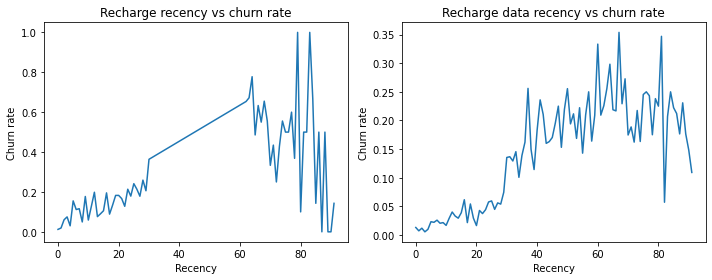

In [324]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
curn_rate = pd.crosstab(high_value.rec_action_phase, high_value.churn, normalize='index')
plt.xlabel('Recency')
plt.ylabel('Churn rate')
plt.title('Recharge recency vs churn rate')
plt.plot(curn_rate[1.0])

plt.subplot(1, 2, 2)
curn_rate = pd.crosstab(high_value.rec_data_action_phase, high_value.churn, normalize='index')
plt.xlabel('Recency')
plt.ylabel('Churn rate')
plt.title('Recharge data recency vs churn rate')
plt.plot(curn_rate[1.0])

plt.tight_layout()
plt.show()

#### - Comparing the average across Good phase and Action Phase

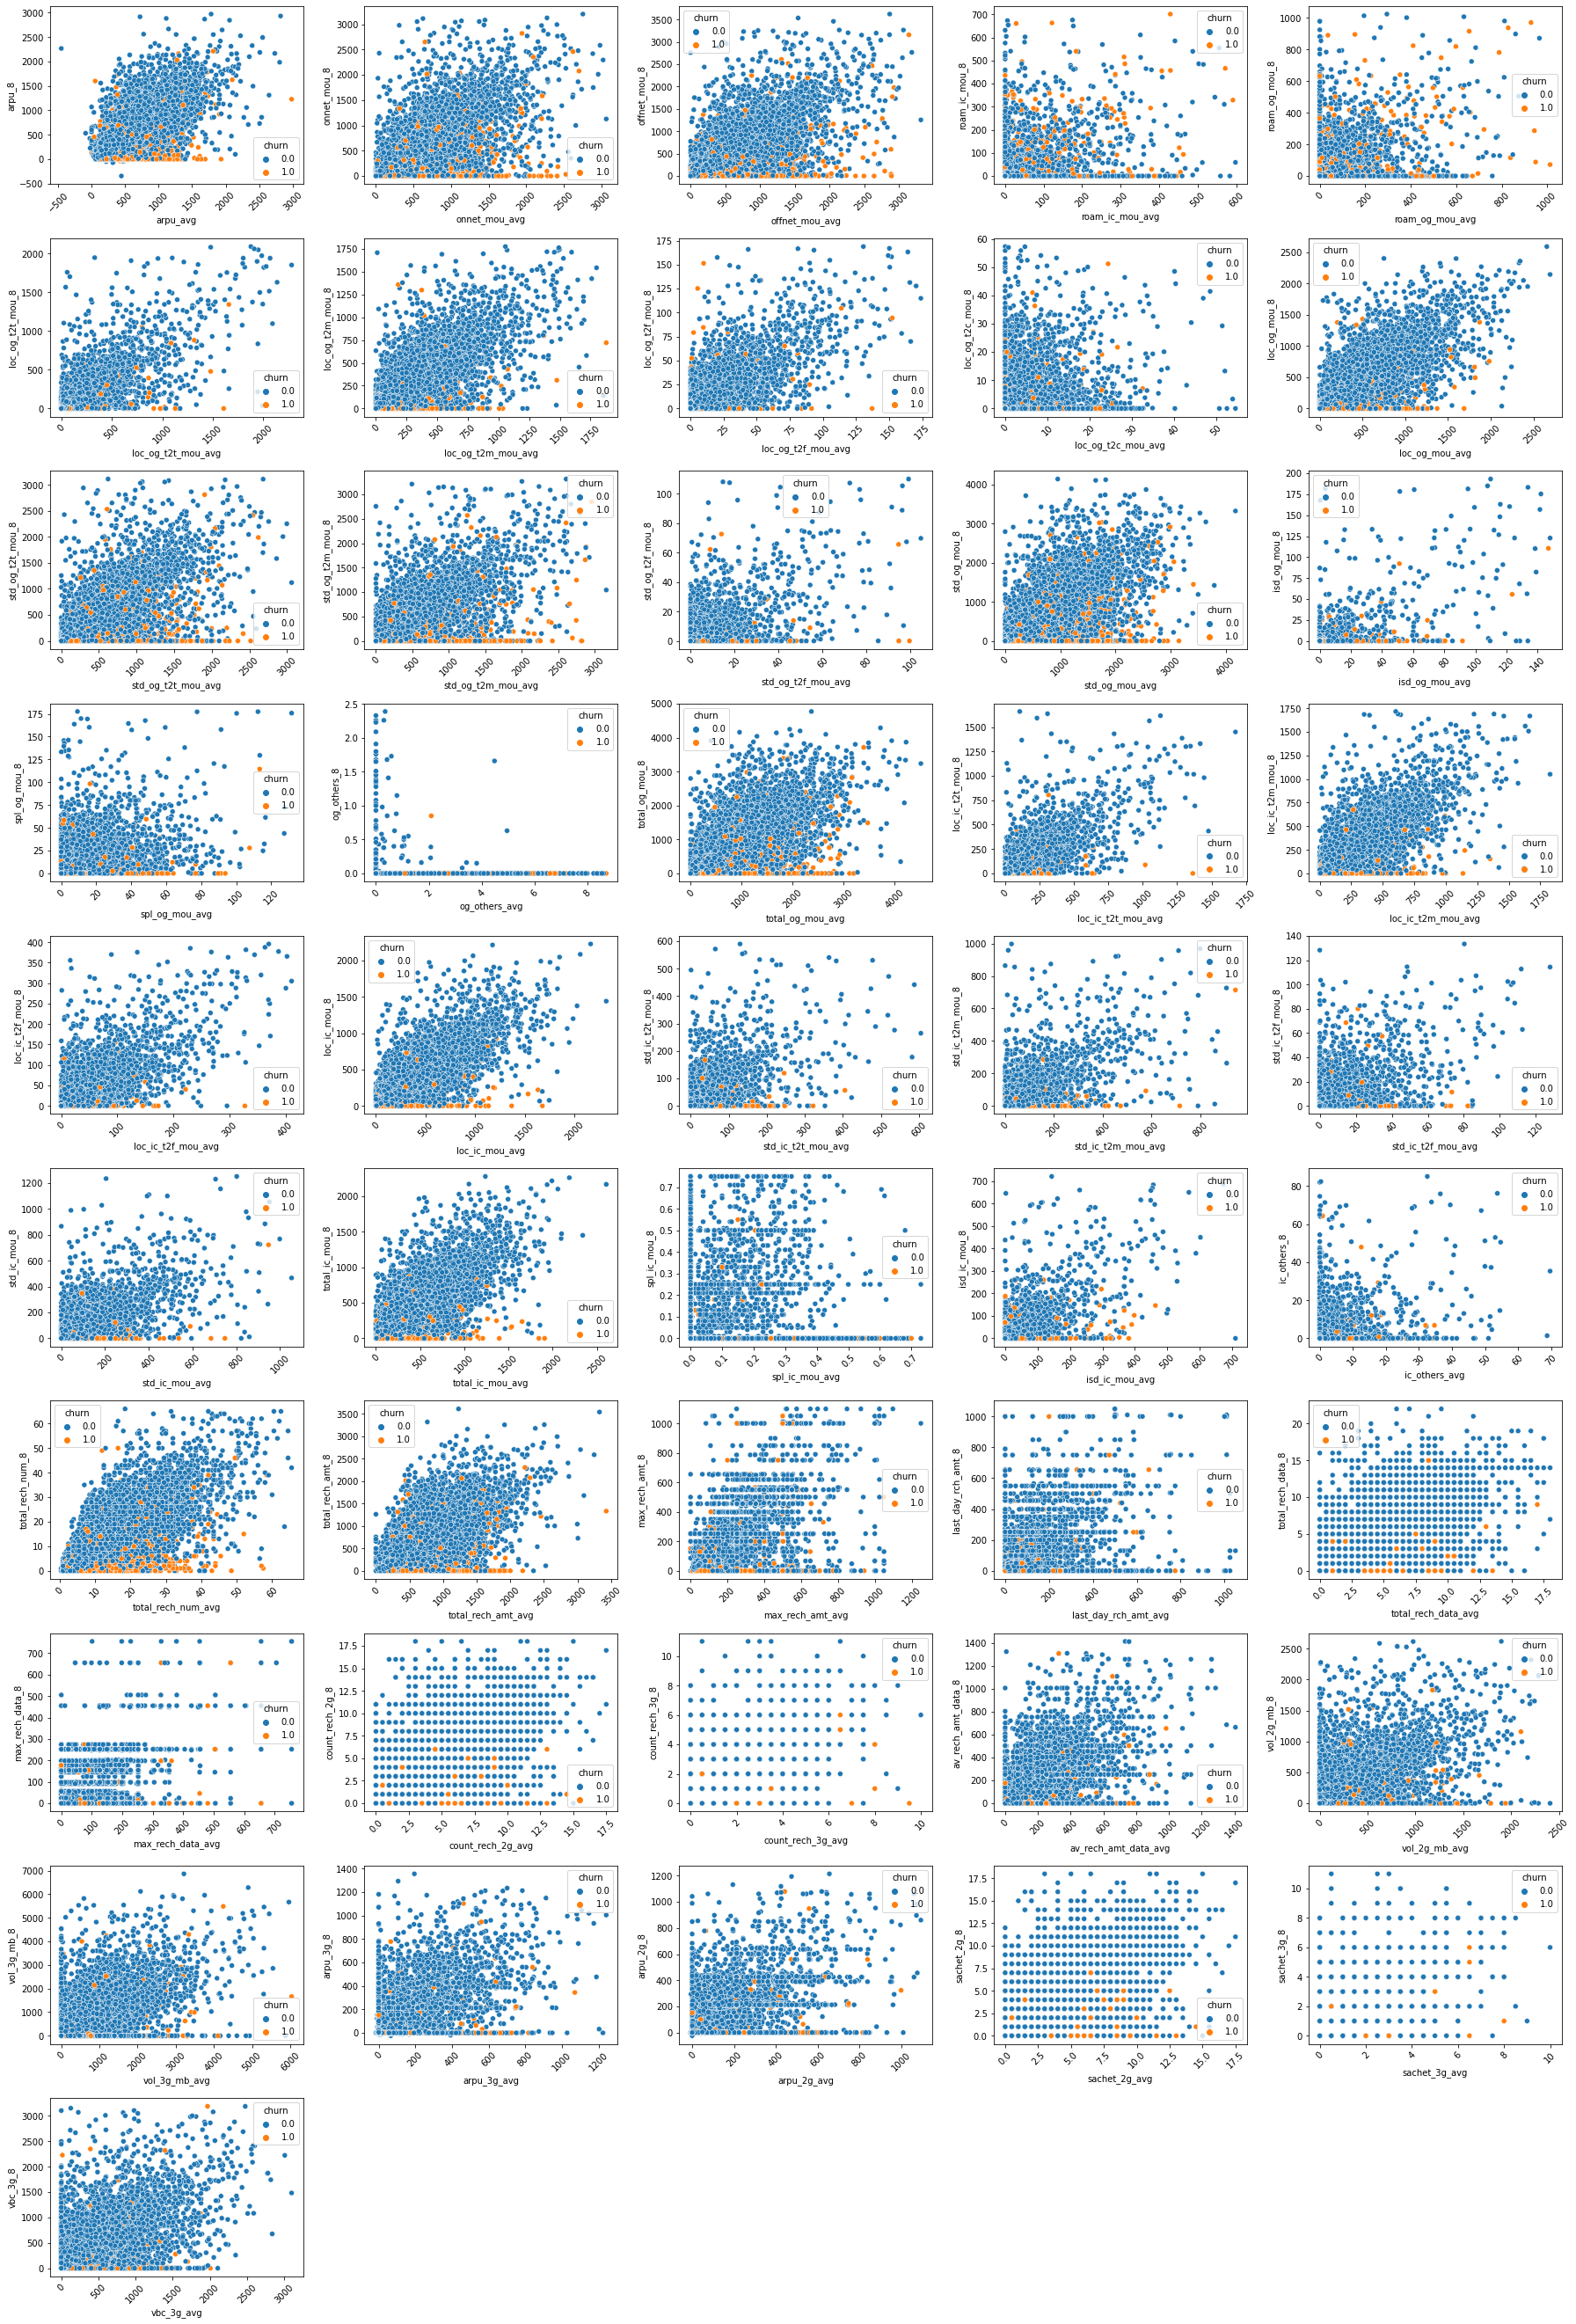

In [325]:
# Visualizing the average across the columns
col_avg = []

for c in range (0, len(c6)):
    col_avg.append(c6[c][:-2] + '_avg')
    high_value[col_avg[c]] = (high_value[c6[c]] + high_value[c7[c]]) / 2
    
plt.figure(figsize=(25.0, (len(c8) / 5) * 4))

for n in range(1, len(c8) + 1):
    mscatterplot(df=high_value, x_colname=col_avg[n-1], y_colname=c8[n-1], hue_colname='churn', pltnum=n, listlen=len(c8)+1)

plt.tight_layout()
plt.show()

# Dropping all the _avg columns created
high_value.drop(columns=col_avg, inplace=True)

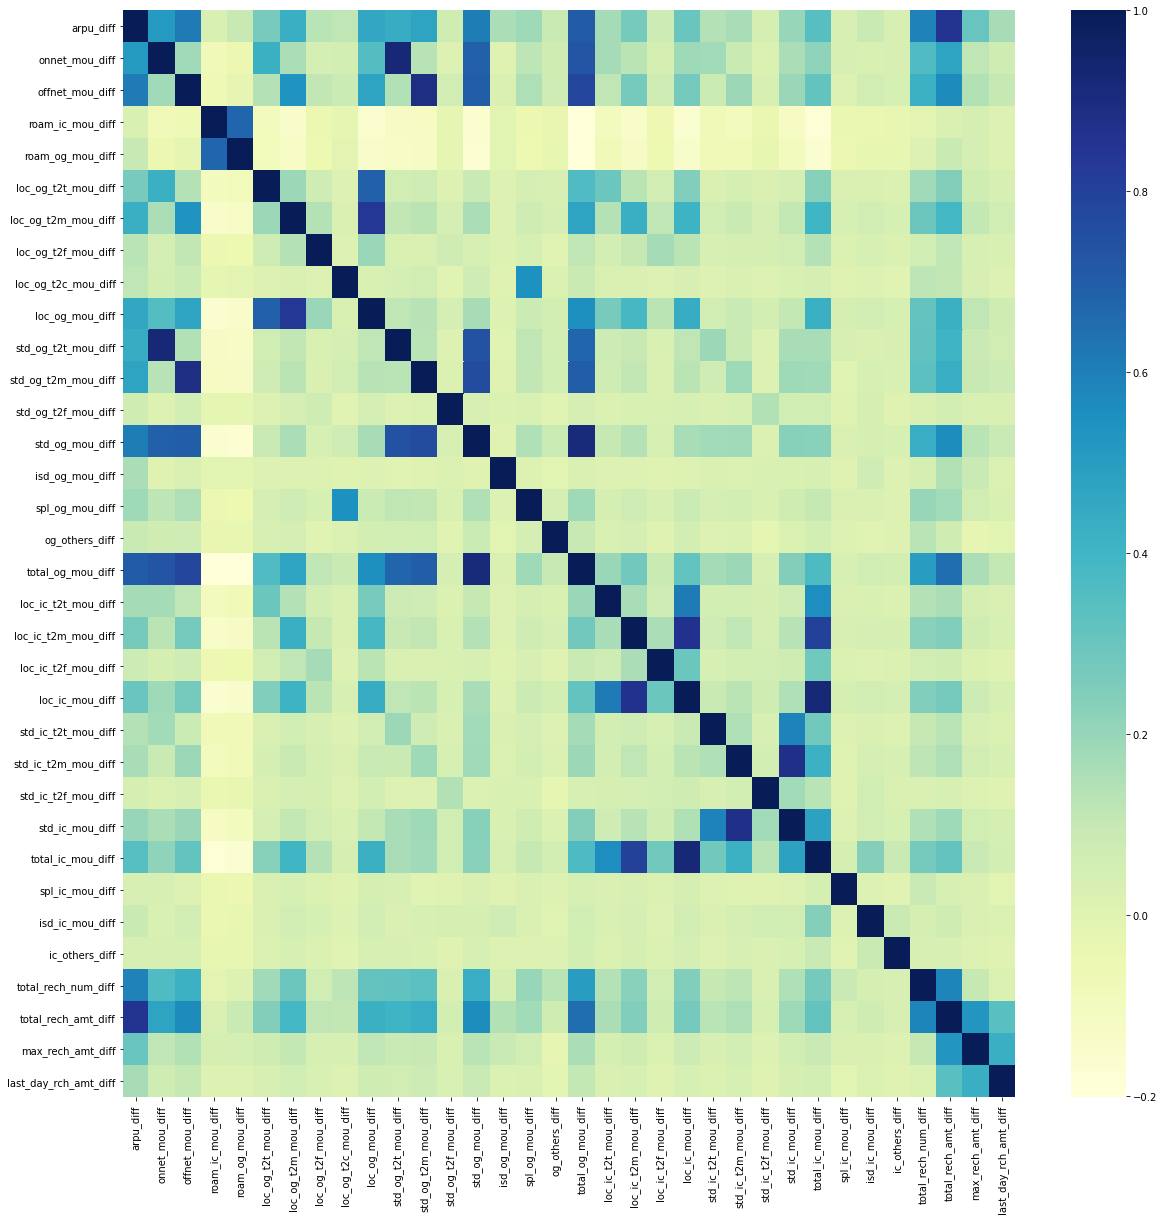

In [326]:
plt.figure(figsize=(20, 20))

columns_corr = [col for col in hv_diff.columns if (('_diff' in col) and ('_2g' not in col) and ('_3g' not in col) and ('_data' not in col))]
sns.heatmap(hv_diff[columns_corr].corr(), cmap='YlGnBu')
plt.show()

In [327]:
hv_diff.head()

arpu_diff  arpu_trend  onnet_mou_diff  onnet_mou_trend  offnet_mou_diff  \
0     7.7025           1           0.000                1            0.000   
1  -298.1100           0        -347.280                0           48.835   
2    81.6570           1         -32.120                0          156.085   
3   232.8425           1         -16.230                0          118.505   
4   -31.3635           0         231.905                1           28.090   

   offnet_mou_trend  roam_ic_mou_diff  roam_ic_mou_trend  roam_og_mou_diff  \
0                 1               0.0                  1               0.0   
1                 1               0.0                  1               0.0   
2                 1               0.0                  1               0.0   
3                 1               0.0                  1               0.0   
4                 1               0.0                  1               0.0   

   roam_og_mou_trend  loc_og_t2t_mou_diff  loc_og_t2t_mou_trend  \
0                  1                0.000                     1   
1                  1             -244.870                     0   
2                  1               18.020                     1   
3                  1              -16.230                     0   
4                  1              -14.125                     0   

   loc_og_t2m_mou_diff  loc_og_t2m_mou_trend  loc_og_t2f_mou_diff  \
0                0.000                     1                0.000   
1              -25.230                     0                0.000   
2               14.940                     1                1.205   
3               65.585                     1                0.000   
4               -6.015                     0                0.000   

   loc_og_t2f_mou_trend  loc_og_t2c_mou_diff  loc_og_t2c_mou_trend  \
0                     1                 0.00                     1   
1                     1                 7.15                     1   
2                     1                 0.00                     1   
3                     1                17.71                     1   
4                     1                 0.00                     1   

   loc_og_mou_diff  loc_og_mou_trend  std_og_t2t_mou_diff  \
0            0.000                 1                0.000   
1         -270.095                 0             -102.415   
2           34.175                 1              -50.145   
3           49.345                 1                0.000   
4          -20.145                 0              246.020   

   std_og_t2t_mou_trend  std_og_t2m_mou_diff  std_og_t2m_mou_trend  \
0                     1                0.000                     1   
1                     0               63.825                     1   
2                     0              139.940                     1   
3                     1               35.255                     1   
4                     1               34.105                     1   

   std_og_t2f_mou_diff  std_og_t2f_mou_trend  std_og_mou_diff  \
0                  0.0                     1            0.000   
1                  0.0                     1          -38.590   
2                  0.0                     1           89.800   
3                  0.0                     1           35.255   
4                  0.0                     1          280.130   

   std_og_mou_trend  isd_og_mou_diff  isd_og_mou_trend  spl_og_mou_diff  \
0                 1            0.000                 1             0.00   
1                 0            0.000                 1            10.23   
2                 1            0.000                 1             0.00   
3                 1           -0.005                 0            17.66   
4                 1            0.000                 1             0.00   

   spl_og_mou_trend  og_others_diff  og_others_trend  total_og_mou_diff  \
0                 1             0.0                1              0.000   
1                 1             0.0           

### 8. Data Preparation

#### Moving required columns from the high_value dataset to the hv_diff dataset

In [328]:
hv_diff[['rec_good_phase', 'rec_action_phase', 
         'rec_data_good_phase', 'rec_data_action_phase',
         'aon', 'churn']] = high_value[['rec_good_phase', 'rec_action_phase',
                                        'rec_data_good_phase', 'rec_data_action_phase',
                                        'aon', 'churn']]
display(hv_diff.describe())

arpu_diff    arpu_trend  onnet_mou_diff  onnet_mou_trend  \
count  26785.000000  26785.000000    26785.000000     26785.000000   
mean     -52.558720      0.401979      -30.891716         0.437446   
std      267.685137      0.490307      254.900737         0.496081   
min    -2045.424500      0.000000    -2495.100000         0.000000   
25%     -173.437000      0.000000      -51.175000         0.000000   
50%      -41.048000      0.000000       -3.135000         0.000000   
75%       77.250500      1.000000       17.625000         1.000000   
max     2718.573500      1.000000     2667.980000         1.000000   

       offnet_mou_diff  offnet_mou_trend  roam_ic_mou_diff  roam_ic_mou_trend  \
count     26785.000000      26785.000000      26785.000000       26785.000000   
mean        -40.942737          0.422177         -1.618503           0.778197   
std         284.537661          0.493916         43.308432           0.415467   
min       -2891.605000          0.000000       -583.620000           0.000000   
25%         -96.950000          0.000000          0.000000           1.000000   
50%         -10.715000          0.000000          0.000000           1.000000   
75%          38.780000          1.000000          0.000000           1.000000   
max        2758.810000          1.000000        666.750000           1.000000   

       roam_og_mou_diff  roam_og_mou_trend  loc_og_t2t_mou_diff  \
count      26785.000000       26785.000000         26785.000000   
mean          -3.379274           0.773530            -6.697109   
std           67.504216           0.418555            96.094075   
min         -940.560000           0.000000         -1955.535000   
25%            0.000000           1.000000           -16.470000   
50%            0.000000           1.000000            -1.045000   
75%            0.000000           1.000000             8.010000   
max          980.610000           1.000000          1699.750000   

       loc_og_t2t_mou_trend  loc_og_t2m_mou_diff  loc_og_t2m_mou_trend  \
count          26785.000000         26785.000000          26785.000000   
mean               0.452007           -10.649189              0.446705   
std                0.497701           125.683764              0.497161   
min                0.000000         -1715.685000              0.000000   
25%                0.000000           -38.100000              0.000000   
50%                0.000000            -3.050000              0.000000   
75%                1.000000            21.135000              1.000000   
max                1.000000          1696.975000              1.000000   

       loc_og_t2f_mou_diff  loc_og_t2f_mou_trend  loc_og_t2c_mou_diff  \
count         26785.000000          26785.000000         26785.000000   
mean             -0.394935              0.593653            -0.015260   
std               8.981420              0.491160             4.878583   
min            -137.120000              0.000000           -54.560000   
25%              -1.170000              0.000000            -0.330000   
50%               0.000000              1.000000             0.000000   
75%               0.210000              1.000000             0.000000   
max             141.470000              1.000000            57.290000   

       loc_og_t2c_mou_trend  loc_og_mou_diff  loc_og_mou_trend  \
count          26785.000000     26785.000000      26785.000000   
mean               0.700467       -17.741653          0.442449   
std                0.458062       173.609259          0.496686   
min                0.000000     -2092.980000          0.000000   
25%                0.000000       -57.520000          0.000000   
50%                1.000000        -4.905000          0.000000   
75%                1.000000        29.600000          1.000000   
max                1.000000      1692.135000          1.000000   

       std_og_t2t_mou_diff  std_og_t2t_mou_trend  std_og_t2m_mou_diff  \
count         26785.000000          26785.000000    

#### Creating dummy variables for categorical columns

In [329]:
cat_cols_new = ['night_pck', 'fb_user', 'monthly_2g', 'monthly_3g']

dummy_df = pd.get_dummies(data=high_value[cat_cols_new], columns=cat_cols_new, drop_first=True)

hv_diff = pd.concat([hv_diff,dummy_df], axis=1)

print(hv_diff.shape)
hv_diff.head()

(26785, 106)


arpu_diff  arpu_trend  onnet_mou_diff  onnet_mou_trend  offnet_mou_diff  \
0     7.7025           1           0.000                1            0.000   
1  -298.1100           0        -347.280                0           48.835   
2    81.6570           1         -32.120                0          156.085   
3   232.8425           1         -16.230                0          118.505   
4   -31.3635           0         231.905                1           28.090   

   offnet_mou_trend  roam_ic_mou_diff  roam_ic_mou_trend  roam_og_mou_diff  \
0                 1               0.0                  1               0.0   
1                 1               0.0                  1               0.0   
2                 1               0.0                  1               0.0   
3                 1               0.0                  1               0.0   
4                 1               0.0                  1               0.0   

   roam_og_mou_trend  loc_og_t2t_mou_diff  loc_og_t2t_mou_trend  \
0                  1                0.000                     1   
1                  1             -244.870                     0   
2                  1               18.020                     1   
3                  1              -16.230                     0   
4                  1              -14.125                     0   

   loc_og_t2m_mou_diff  loc_og_t2m_mou_trend  loc_og_t2f_mou_diff  \
0                0.000                     1                0.000   
1              -25.230                     0                0.000   
2               14.940                     1                1.205   
3               65.585                     1                0.000   
4               -6.015                     0                0.000   

   loc_og_t2f_mou_trend  loc_og_t2c_mou_diff  loc_og_t2c_mou_trend  \
0                     1                 0.00                     1   
1                     1                 7.15                     1   
2                     1                 0.00                     1   
3                     1                17.71                     1   
4                     1                 0.00                     1   

   loc_og_mou_diff  loc_og_mou_trend  std_og_t2t_mou_diff  \
0            0.000                 1                0.000   
1         -270.095                 0             -102.415   
2           34.175                 1              -50.145   
3           49.345                 1                0.000   
4          -20.145                 0              246.020   

   std_og_t2t_mou_trend  std_og_t2m_mou_diff  std_og_t2m_mou_trend  \
0                     1                0.000                     1   
1                     0               63.825                     1   
2                     0              139.940                     1   
3                     1               35.255                     1   
4                     1               34.105                     1   

   std_og_t2f_mou_diff  std_og_t2f_mou_trend  std_og_mou_diff  \
0                  0.0                     1            0.000   
1                  0.0                     1          -38.590   
2                  0.0                     1           89.800   
3                  0.0                     1           35.255   
4                  0.0                     1          280.130   

   std_og_mou_trend  isd_og_mou_diff  isd_og_mou_trend  spl_og_mou_diff  \
0                 1            0.000                 1             0.00   
1                 0            0.000                 1            10.23   
2                 1            0.000                 1             0.00   
3                 1           -0.005                 0            17.66   
4                 1            0.000                 1             0.00   

   spl_og_mou_trend  og_others_diff  og_others_trend  total_og_mou_diff  \
0                 1             0.0                1              0.000   
1                 1             0.0           

### 9. Model Building

#### Dividing the data into Train and Test set

In [330]:
# Splitting into Train and test set
X = hv_diff.drop(columns='churn')
y = hv_diff['churn']
X_columns = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(f"{X.shape}\n\n{y.shape}")

(26785, 105)

(26785,)


In [331]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = y_train.values
y_test = y_test.values

print(y_train.shape)

(18749,)


#### Running Standard Scaler on the the train and test data

In [332]:
X_cat_cols = list(dummy_df.columns.values) + columns_cat_trend
X_num_cols = X_train.drop(X_cat_cols,axis=1).columns.tolist()

# Useing standard scaler for scaling continous features
scaler = StandardScaler()
X_train = pd.concat([X_train[X_cat_cols], pd.DataFrame(scaler.fit_transform(X_train.drop(X_cat_cols, axis=1)))], axis=1)
X_test = pd.concat([X_test[X_cat_cols],pd.DataFrame(scaler.transform(X_test.drop(X_cat_cols, axis=1)))], axis=1)

X_train.columns = X_cat_cols + X_num_cols
X_test.columns = X_cat_cols + X_num_cols

In [333]:
print(f"{X_train.shape}")
round(X_train.describe())

(18749, 105)


night_pck_0  night_pck_1  fb_user_0  fb_user_1  monthly_2g_0  \
count      18749.0      18749.0    18749.0    18749.0       18749.0   
mean           1.0          0.0        1.0        0.0           1.0   
std            0.0          0.0        0.0        0.0           0.0   
min            0.0          0.0        0.0        0.0           0.0   
25%            1.0          0.0        0.0        0.0           1.0   
50%            1.0          0.0        1.0        0.0           1.0   
75%            1.0          0.0        1.0        0.0           1.0   
max            1.0          1.0        1.0        1.0           1.0   

       monthly_2g_1  monthly_3g_0  monthly_3g_1  arpu_trend  onnet_mou_trend  \
count       18749.0       18749.0       18749.0     18749.0          18749.0   
mean            0.0           1.0           0.0         0.0              0.0   
std             0.0           0.0           0.0         0.0              0.0   
min             0.0           0.0           0.0         0.0              0.0   
25%             0.0           1.0           0.0         0.0              0.0   
50%             0.0           1.0           0.0         0.0              0.0   
75%             0.0           1.0           0.0         1.0              1.0   
max             1.0           1.0           1.0         1.0              1.0   

       offnet_mou_trend  roam_ic_mou_trend  roam_og_mou_trend  \
count           18749.0            18749.0            18749.0   
mean                0.0                1.0                1.0   
std                 0.0                0.0                0.0   
min                 0.0                0.0                0.0   
25%                 0.0                1.0                1.0   
50%                 0.0                1.0                1.0   
75%                 1.0                1.0                1.0   
max                 1.0                1.0                1.0   

       loc_og_t2t_mou_trend  loc_og_t2m_mou_trend  loc_og_t2f_mou_trend  \
count               18749.0               18749.0               18749.0   
mean                    0.0                   0.0                   1.0   
std                     0.0                   0.0                   0.0   
min                     0.0                   0.0                   0.0   
25%                     0.0                   0.0                   0.0   
50%                     0.0                   0.0                   1.0   
75%                     1.0                   1.0                   1.0   
max                     1.0                   1.0                   1.0   

       loc_og_t2c_mou_trend  loc_og_mou_trend  std_og_t2t_mou_trend  \
count               18749.0           18749.0               18749.0   
mean                    1.0               0.0                   1.0   
std                     0.0               0.0                   0.0   
min                     0.0               0.0                   0.0   
25%                     0.0               0.0                   0.0   
50%                     1.0               0.0                   1.0   
75%                     1.0               1.0                   1.0   
max                     1.0               1.0                   1.0   

       std_og_t2m_mou_trend  std_og_t2f_mou_trend  std_og_mou_trend  \
count               18749.0               18749.0           18749.0   
mean                    0.0                   1.0               0.0   
std                     1.0                   0.0               0.0   
min                     0.0                   0.0               0.0   
25%                     0.0                   1.0               0.0   
50%                     0.0                   1.0               0.0   
75%                     1.0                   1.0               1.0   
max                     1.0                   1.0               1.0   

       isd_og_mou_trend  spl_og_mou_trend  og_others_trend  \
count           18749.0           18749.0 

#### Running SMOTE, to deal with class imbalance

In [334]:
# Using smote, to deal with class imbalance
counter = Counter(y_train)
print('Before', counter)
smt = SMOTE()
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_smote)
print('After', counter)

Before Counter({0.0: 17235, 1.0: 1514})
After Counter({0.0: 17235, 1.0: 17235})


### Building the model

#### Building a model, on the data that has not been treated with smote to counter class imbalance

Note: Please use the best parameters to run the gridsearch, else it will take a long time to complete all the fits. This applies for all the 4 models below.

In [192]:
# hyperparameter tuning with Random Forest

# specify range of hyperparameters
param_grid = {    
     'max_depth': [ 8, 10, 12],
     'max_features': ['sqrt', 30,40, 50, 60],
     'min_samples_leaf': range(50, 200, 50),     
     'class_weight' : ['balanced', {0:1, 1:16}] ,           
     'n_estimators': range(100,300,100)
}

# specify model
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['recall', 'precision', 'accuracy', 'f1']
rf = RandomForestClassifier(random_state=42, oob_score=True)

# set up GridSearchCV()
model_cv_rf = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring=scoring,
                           refit='recall',
                           cv=folds,
                           verbose=3,
                           return_train_score=True)                         
                
model_cv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END class_weight=balanced, max_depth=8, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.894, test=0.892) f1: (train=0.557, test=0.527) precision: (train=0.421, test=0.408) recall: (train=0.824, test=0.743) total time=   3.2s
[CV 2/5] END class_weight=balanced, max_depth=8, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.894, test=0.894) f1: (train=0.557, test=0.550) precision: (train=0.421, test=0.418) recall: (train=0.824, test=0.805) total time=   2.9s
[CV 3/5] END class_weight=balanced, max_depth=8, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.898, test=0.884) f1: (train=0.566, test=0.519) precision: (train=0.431, test=0.390) recall: (train=0.826, test=0.776) total time=   2.9s
[CV 4/5] END class_weight=balanced, max_depth=8, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.892, test=0.891) f1: (

[CV 2/5] END class_weight=balanced, max_depth=8, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.902, test=0.895) f1: (train=0.587, test=0.549) precision: (train=0.446, test=0.422) recall: (train=0.857, test=0.789) total time=   8.5s
[CV 3/5] END class_weight=balanced, max_depth=8, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.904, test=0.885) f1: (train=0.592, test=0.520) precision: (train=0.452, test=0.392) recall: (train=0.859, test=0.772) total time=   8.1s
[CV 4/5] END class_weight=balanced, max_depth=8, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.903, test=0.897) f1: (train=0.588, test=0.535) precision: (train=0.447, test=0.421) recall: (train=0.860, test=0.733) total time=   7.5s
[CV 5/5] END class_weight=balanced, max_depth=8, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.904, test=0.890) f1: (train=0.590, test=0.542) precision: (train=0.451, test=0.408) recall: (

[CV 4/5] END class_weight=balanced, max_depth=8, max_features=40, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.903, test=0.895) f1: (train=0.593, test=0.532) precision: (train=0.450, test=0.416) recall: (train=0.871, test=0.739) total time=   9.7s
[CV 5/5] END class_weight=balanced, max_depth=8, max_features=40, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.904, test=0.889) f1: (train=0.593, test=0.541) precision: (train=0.452, test=0.406) recall: (train=0.861, test=0.811) total time=   9.6s
[CV 1/5] END class_weight=balanced, max_depth=8, max_features=40, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.904, test=0.893) f1: (train=0.591, test=0.532) precision: (train=0.452, test=0.412) recall: (train=0.857, test=0.752) total time=  20.0s
[CV 2/5] END class_weight=balanced, max_depth=8, max_features=40, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.904, test=0.899) f1: (train=0.590, test=0.558) precision: (train=0.449, test=0.433) recall: (

[CV 1/5] END class_weight=balanced, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.904, test=0.893) f1: (train=0.591, test=0.533) precision: (train=0.451, test=0.412) recall: (train=0.857, test=0.752) total time=  24.2s
[CV 2/5] END class_weight=balanced, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.905, test=0.898) f1: (train=0.594, test=0.555) precision: (train=0.453, test=0.430) recall: (train=0.860, test=0.785) total time=  24.1s
[CV 3/5] END class_weight=balanced, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.905, test=0.881) f1: (train=0.594, test=0.508) precision: (train=0.455, test=0.381) recall: (train=0.858, test=0.762) total time=  24.4s
[CV 4/5] END class_weight=balanced, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.904, test=0.896) f1: (train=0.595, test=0.532) precision: (train=0.451, test=0.417) recall: (

[CV 3/5] END class_weight=balanced, max_depth=8, max_features=60, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.905, test=0.879) f1: (train=0.593, test=0.502) precision: (train=0.454, test=0.376) recall: (train=0.855, test=0.752) total time=  29.0s
[CV 4/5] END class_weight=balanced, max_depth=8, max_features=60, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.904, test=0.895) f1: (train=0.593, test=0.531) precision: (train=0.450, test=0.417) recall: (train=0.870, test=0.733) total time=  29.1s
[CV 5/5] END class_weight=balanced, max_depth=8, max_features=60, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.904, test=0.891) f1: (train=0.591, test=0.542) precision: (train=0.451, test=0.409) recall: (train=0.856, test=0.801) total time=  28.8s
[CV 1/5] END class_weight=balanced, max_depth=8, max_features=60, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.888, test=0.876) f1: (train=0.548, test=0.499) precision: (train=0.407, test=0.370) recall: 

[CV 5/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.899, test=0.891) f1: (train=0.569, test=0.545) precision: (train=0.434, test=0.410) recall: (train=0.826, test=0.811) total time=   6.3s
[CV 1/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.883, test=0.878) f1: (train=0.532, test=0.502) precision: (train=0.393, test=0.374) recall: (train=0.820, test=0.762) total time=   2.9s
[CV 2/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.881, test=0.881) f1: (train=0.526, test=0.527) precision: (train=0.387, test=0.388) recall: (train=0.818, test=0.818) total time=   2.9s
[CV 3/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.886, test=0.871) f1: (train=0.538, test=0.493) precision: (train=0.400, test=0

[CV 2/5] END class_weight=balanced, max_depth=10, max_features=30, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.889, test=0.884) f1: (train=0.550, test=0.530) precision: (train=0.408, test=0.394) recall: (train=0.840, test=0.809) total time=   7.4s
[CV 3/5] END class_weight=balanced, max_depth=10, max_features=30, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.889, test=0.876) f1: (train=0.552, test=0.503) precision: (train=0.410, test=0.372) recall: (train=0.843, test=0.776) total time=   7.5s
[CV 4/5] END class_weight=balanced, max_depth=10, max_features=30, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.886, test=0.885) f1: (train=0.547, test=0.509) precision: (train=0.402, test=0.389) recall: (train=0.854, test=0.736) total time=   7.4s
[CV 5/5] END class_weight=balanced, max_depth=10, max_features=30, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.887, test=0.876) f1: (train=0.548, test=0.519) precision: (train=0.406, test=0.377) r

[CV 4/5] END class_weight=balanced, max_depth=10, max_features=40, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.883, test=0.882) f1: (train=0.540, test=0.505) precision: (train=0.395, test=0.382) recall: (train=0.852, test=0.746) total time=   9.8s
[CV 5/5] END class_weight=balanced, max_depth=10, max_features=40, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.887, test=0.874) f1: (train=0.547, test=0.514) precision: (train=0.405, test=0.373) recall: (train=0.843, test=0.825) total time=  11.6s
[CV 1/5] END class_weight=balanced, max_depth=10, max_features=40, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.887, test=0.876) f1: (train=0.549, test=0.502) precision: (train=0.406, test=0.371) recall: (train=0.847, test=0.772) total time=  20.7s
[CV 2/5] END class_weight=balanced, max_depth=10, max_features=40, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.887, test=0.886) f1: (train=0.546, test=0.533) precision: (train=0.403, test=0.399) r

[CV 1/5] END class_weight=balanced, max_depth=10, max_features=50, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.888, test=0.876) f1: (train=0.551, test=0.501) precision: (train=0.408, test=0.371) recall: (train=0.849, test=0.769) total time=  24.1s
[CV 2/5] END class_weight=balanced, max_depth=10, max_features=50, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.887, test=0.886) f1: (train=0.546, test=0.533) precision: (train=0.404, test=0.399) recall: (train=0.841, test=0.802) total time=  24.2s
[CV 3/5] END class_weight=balanced, max_depth=10, max_features=50, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.883, test=0.865) f1: (train=0.542, test=0.485) precision: (train=0.396, test=0.351) recall: (train=0.854, test=0.785) total time=  24.2s
[CV 4/5] END class_weight=balanced, max_depth=10, max_features=50, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.885, test=0.886) f1: (train=0.544, test=0.519) precision: (train=0.400, test=0.393) r

[CV 3/5] END class_weight=balanced, max_depth=10, max_features=60, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.883, test=0.865) f1: (train=0.541, test=0.481) precision: (train=0.396, test=0.348) recall: (train=0.852, test=0.776) total time=  28.9s
[CV 4/5] END class_weight=balanced, max_depth=10, max_features=60, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.885, test=0.882) f1: (train=0.546, test=0.507) precision: (train=0.401, test=0.383) recall: (train=0.855, test=0.752) total time=  29.4s
[CV 5/5] END class_weight=balanced, max_depth=10, max_features=60, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.887, test=0.877) f1: (train=0.549, test=0.517) precision: (train=0.406, test=0.378) recall: (train=0.851, test=0.815) total time=  29.0s
[CV 1/5] END class_weight=balanced, max_depth=10, max_features=60, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.875, test=0.864) f1: (train=0.517, test=0.480) precision: (train=0.375, test=0.347) r

[CV 5/5] END class_weight=balanced, max_depth=12, max_features=sqrt, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.882, test=0.875) f1: (train=0.527, test=0.512) precision: (train=0.390, test=0.374) recall: (train=0.812, test=0.811) total time=   5.9s
[CV 1/5] END class_weight=balanced, max_depth=12, max_features=sqrt, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.873, test=0.868) f1: (train=0.508, test=0.485) precision: (train=0.369, test=0.354) recall: (train=0.815, test=0.769) total time=   2.7s
[CV 2/5] END class_weight=balanced, max_depth=12, max_features=sqrt, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.872, test=0.873) f1: (train=0.502, test=0.509) precision: (train=0.367, test=0.370) recall: (train=0.797, test=0.815) total time=   2.7s
[CV 3/5] END class_weight=balanced, max_depth=12, max_features=sqrt, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.879, test=0.867) f1: (train=0.517, test=0.485) precision: (train=0.381, test=

[CV 2/5] END class_weight=balanced, max_depth=12, max_features=30, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.879, test=0.878) f1: (train=0.524, test=0.519) precision: (train=0.385, test=0.381) recall: (train=0.823, test=0.815) total time=   6.8s
[CV 3/5] END class_weight=balanced, max_depth=12, max_features=30, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.880, test=0.868) f1: (train=0.527, test=0.491) precision: (train=0.386, test=0.357) recall: (train=0.831, test=0.789) total time=   6.7s
[CV 4/5] END class_weight=balanced, max_depth=12, max_features=30, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.874, test=0.874) f1: (train=0.516, test=0.486) precision: (train=0.373, test=0.362) recall: (train=0.836, test=0.739) total time=   6.8s
[CV 5/5] END class_weight=balanced, max_depth=12, max_features=30, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.878, test=0.868) f1: (train=0.523, test=0.503) precision: (train=0.382, test=0.361) r

[CV 4/5] END class_weight=balanced, max_depth=12, max_features=40, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.872, test=0.875) f1: (train=0.515, test=0.493) precision: (train=0.371, test=0.367) recall: (train=0.838, test=0.752) total time=  11.3s
[CV 5/5] END class_weight=balanced, max_depth=12, max_features=40, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.875, test=0.865) f1: (train=0.519, test=0.495) precision: (train=0.376, test=0.354) recall: (train=0.838, test=0.821) total time=   8.9s
[CV 1/5] END class_weight=balanced, max_depth=12, max_features=40, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.874, test=0.862) f1: (train=0.515, test=0.476) precision: (train=0.373, test=0.344) recall: (train=0.827, test=0.772) total time=  18.1s
[CV 2/5] END class_weight=balanced, max_depth=12, max_features=40, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.877, test=0.879) f1: (train=0.521, test=0.520) precision: (train=0.379, test=0.382) r

[CV 1/5] END class_weight=balanced, max_depth=12, max_features=50, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.876, test=0.863) f1: (train=0.522, test=0.479) precision: (train=0.379, test=0.346) recall: (train=0.836, test=0.776) total time=  22.6s
[CV 2/5] END class_weight=balanced, max_depth=12, max_features=50, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.877, test=0.881) f1: (train=0.522, test=0.519) precision: (train=0.381, test=0.385) recall: (train=0.827, test=0.799) total time=  23.3s
[CV 3/5] END class_weight=balanced, max_depth=12, max_features=50, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.871, test=0.854) f1: (train=0.513, test=0.465) precision: (train=0.369, test=0.331) recall: (train=0.841, test=0.785) total time=  22.8s
[CV 4/5] END class_weight=balanced, max_depth=12, max_features=50, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.873, test=0.876) f1: (train=0.518, test=0.496) precision: (train=0.374, test=0.370) r

[CV 3/5] END class_weight=balanced, max_depth=12, max_features=60, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.869, test=0.850) f1: (train=0.510, test=0.456) precision: (train=0.366, test=0.323) recall: (train=0.841, test=0.776) total time=  29.0s
[CV 4/5] END class_weight=balanced, max_depth=12, max_features=60, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.870, test=0.872) f1: (train=0.510, test=0.490) precision: (train=0.367, test=0.362) recall: (train=0.838, test=0.759) total time=  29.1s
[CV 5/5] END class_weight=balanced, max_depth=12, max_features=60, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.876, test=0.863) f1: (train=0.521, test=0.493) precision: (train=0.378, test=0.352) recall: (train=0.834, test=0.825) total time=  28.7s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.877, test=0.865) f1: (train=0.533, test=0.484) precision: (train=0.384, test=0.3

[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=sqrt, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.842, test=0.847) f1: (train=0.470, test=0.448) precision: (train=0.322, test=0.317) recall: (train=0.867, test=0.766) total time=   5.7s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=sqrt, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.842, test=0.835) f1: (train=0.468, test=0.457) precision: (train=0.321, test=0.311) recall: (train=0.858, test=0.861) total time=   5.4s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.888, test=0.874) f1: (train=0.563, test=0.503) precision: (train=0.410, test=0.369) recall: (train=0.898, test=0.789) total time=   7.9s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.888, test=0.877) f1: (train=0.563, test=0.522) precision: (train=0.

[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=30, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.847, test=0.838) f1: (train=0.483, test=0.464) precision: (train=0.332, test=0.316) recall: (train=0.883, test=0.871) total time=  12.9s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=40, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.891, test=0.875) f1: (train=0.572, test=0.507) precision: (train=0.419, test=0.372) recall: (train=0.903, test=0.799) total time=   9.8s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=40, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.888, test=0.879) f1: (train=0.564, test=0.529) precision: (train=0.411, test=0.387) recall: (train=0.898, test=0.838) total time=  10.5s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=40, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.889, test=0.863) f1: (train=0.570, test=0.488) precision: (train=0.415, 

[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.891, test=0.873) f1: (train=0.571, test=0.499) precision: (train=0.418, test=0.366) recall: (train=0.901, test=0.785) total time=  12.3s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.889, test=0.878) f1: (train=0.567, test=0.520) precision: (train=0.413, test=0.381) recall: (train=0.903, test=0.818) total time=  12.3s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.888, test=0.861) f1: (train=0.568, test=0.482) precision: (train=0.413, test=0.345) recall: (train=0.908, test=0.799) total time=  12.3s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.884, test=0.879) f1: (train=0.558, test=0.507) precision: (train=0.403, t

[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=60, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.888, test=0.879) f1: (train=0.567, test=0.521) precision: (train=0.412, test=0.382) recall: (train=0.908, test=0.815) total time=  14.8s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=60, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.891, test=0.861) f1: (train=0.573, test=0.481) precision: (train=0.419, test=0.344) recall: (train=0.907, test=0.799) total time=  15.0s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=60, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.885, test=0.879) f1: (train=0.563, test=0.507) precision: (train=0.406, test=0.377) recall: (train=0.914, test=0.772) total time=  14.9s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=60, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.888, test=0.871) f1: (train=0.567, test=0.510) precision: (train=0.412, t

[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.888, test=0.871) f1: (train=0.562, test=0.505) precision: (train=0.411, test=0.365) recall: (train=0.889, test=0.815) total time=   3.2s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.883, test=0.878) f1: (train=0.552, test=0.497) precision: (train=0.399, test=0.372) recall: (train=0.896, test=0.746) total time=   3.2s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.884, test=0.872) f1: (train=0.553, test=0.513) precision: (train=0.401, test=0.370) recall: (train=0.891, test=0.838) total time=   3.2s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.884, test=0.870) f1: (train=0.551, test=0.486) precision: (tr

[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.891, test=0.883) f1: (train=0.575, test=0.515) precision: (train=0.420, test=0.388) recall: (train=0.912, test=0.766) total time=   8.8s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.893, test=0.878) f1: (train=0.576, test=0.526) precision: (train=0.423, test=0.383) recall: (train=0.903, test=0.841) total time=   8.0s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=30, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.894, test=0.881) f1: (train=0.580, test=0.521) precision: (train=0.426, test=0.387) recall: (train=0.907, test=0.799) total time=  16.5s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=30, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.894, test=0.883) f1: (train=0.581, test=0.534) precision: (train=0.42

[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=40, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.894, test=0.878) f1: (train=0.581, test=0.523) precision: (train=0.427, test=0.381) recall: (train=0.910, test=0.831) total time=  10.7s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=40, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.895, test=0.880) f1: (train=0.583, test=0.517) precision: (train=0.430, test=0.383) recall: (train=0.907, test=0.792) total time=  21.8s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=40, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.894, test=0.885) f1: (train=0.581, test=0.536) precision: (train=0.426, test=0.397) recall: (train=0.909, test=0.825) total time=  21.5s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=40, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.894, test=0.866) f1: (train=0.580, test=0.492) precision: (train=0.42

[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.897, test=0.879) f1: (train=0.588, test=0.513) precision: (train=0.434, test=0.381) recall: (train=0.908, test=0.785) total time=  26.7s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.893, test=0.883) f1: (train=0.579, test=0.530) precision: (train=0.425, test=0.392) recall: (train=0.908, test=0.818) total time=  26.5s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.894, test=0.867) f1: (train=0.580, test=0.491) precision: (train=0.426, test=0.355) recall: (train=0.910, test=0.795) total time=  26.9s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.892, test=0.886) f1: (train=0.577, test=0.524) precision: (train=0.42

[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=60, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.892, test=0.881) f1: (train=0.577, test=0.527) precision: (train=0.422, test=0.388) recall: (train=0.912, test=0.818) total time=  33.2s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=60, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.895, test=0.868) f1: (train=0.584, test=0.494) precision: (train=0.430, test=0.358) recall: (train=0.908, test=0.795) total time=  32.7s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=60, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.893, test=0.886) f1: (train=0.580, test=0.517) precision: (train=0.425, test=0.392) recall: (train=0.914, test=0.759) total time=  32.5s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=60, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.896, test=0.879) f1: (train=0.586, test=0.520) precision: (train=0.43

[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=sqrt, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.893, test=0.874) f1: (train=0.573, test=0.512) precision: (train=0.422, test=0.373) recall: (train=0.892, test=0.815) total time=   6.7s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=sqrt, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.885, test=0.882) f1: (train=0.557, test=0.506) precision: (train=0.404, test=0.383) recall: (train=0.896, test=0.746) total time=   6.7s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=sqrt, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.886, test=0.876) f1: (train=0.558, test=0.523) precision: (train=0.407, test=0.379) recall: (train=0.887, test=0.844) total time=   6.5s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=sqrt, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.860, test=0.848) f1: (train=0.500, test=0.456) precision: (t

[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=30, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.893, test=0.885) f1: (train=0.580, test=0.517) precision: (train=0.424, test=0.392) recall: (train=0.914, test=0.762) total time=  17.5s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=30, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.894, test=0.879) f1: (train=0.578, test=0.526) precision: (train=0.425, test=0.384) recall: (train=0.903, test=0.834) total time=  17.0s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=30, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.865, test=0.853) f1: (train=0.516, test=0.473) precision: (train=0.363, test=0.333) recall: (train=0.889, test=0.815) total time=   7.6s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=30, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.866, test=0.862) f1: (train=0.517, test=0.501) precision: (train=0.

[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=40, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.895, test=0.879) f1: (train=0.584, test=0.523) precision: (train=0.430, test=0.384) recall: (train=0.912, test=0.821) total time=  21.6s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=40, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.863, test=0.850) f1: (train=0.513, test=0.468) precision: (train=0.360, test=0.328) recall: (train=0.893, test=0.818) total time=   9.7s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=40, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.862, test=0.859) f1: (train=0.511, test=0.493) precision: (train=0.358, test=0.348) recall: (train=0.891, test=0.848) total time=   9.6s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=40, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.864, test=0.842) f1: (train=0.517, test=0.456) precision: (train=0

[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=50, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.866, test=0.851) f1: (train=0.518, test=0.467) precision: (train=0.365, test=0.328) recall: (train=0.893, test=0.809) total time=  11.8s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=50, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.862, test=0.854) f1: (train=0.513, test=0.483) precision: (train=0.359, test=0.339) recall: (train=0.900, test=0.842) total time=  12.0s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=50, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.860, test=0.838) f1: (train=0.509, test=0.452) precision: (train=0.355, test=0.311) recall: (train=0.896, test=0.828) total time=  11.9s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=50, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.857, test=0.859) f1: (train=0.506, test=0.480) precision: (train=

[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=60, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.861, test=0.857) f1: (train=0.510, test=0.489) precision: (train=0.356, test=0.343) recall: (train=0.898, test=0.848) total time=  14.5s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=60, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.859, test=0.840) f1: (train=0.507, test=0.456) precision: (train=0.353, test=0.315) recall: (train=0.894, test=0.828) total time=  14.4s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=60, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.859, test=0.861) f1: (train=0.508, test=0.484) precision: (train=0.353, test=0.346) recall: (train=0.902, test=0.805) total time=  14.4s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=60, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.862, test=0.852) f1: (train=0.511, test=0.481) precision: (train=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             param_grid={'class_weight': ['balanced', {0: 1, 1: 16}],
                         'max_depth': [8, 10, 12],
                         'max_features': ['sqrt', 30, 40, 50, 60],
                         'min_samples_leaf': range(50, 200, 50),
                         'n_estimators': range(100, 300, 100)},
             refit='recall', return_train_score=True,
             scoring=['recall', 'precision', 'accuracy', 'f1'], verbose=3)

In [193]:
cv_result_rf = pd.DataFrame(model_cv_rf.cv_results_)
cv_result_rf

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         3.012825      0.129374         0.052876        0.001784   
1         5.985106      0.254106         0.095145        0.002552   
2         3.654330      0.575869         0.063033        0.012341   
3         6.625294      0.556286         0.105927        0.015956   
4         2.604141      0.019112         0.050459        0.001629   
5         6.017908      0.533911         0.121073        0.022152   
6         8.315935      0.886640         0.057454        0.008082   
7        16.404845      0.734406         0.096737        0.010195   
8         7.031936      0.193858         0.054268        0.007490   
9        13.950701      0.151083         0.090767        0.001655   
10        6.547815      0.033409         0.050661        0.001598   
11       13.107477      0.163343         0.087765        0.002610   
12        9.882779      0.327706         0.052055        0.000738   
13       19.995968      0.803212         0.089665        0.001341   
14        9.512344      0.539283         0.058048        0.012932   
15       18.244595      0.090679         0.087960        0.001451   
16        8.600175      0.087472         0.048074        0.001158   
17       17.190353      0.033961         0.088562        0.001953   
18       12.103180      0.047708         0.050061        0.001721   
19       24.257320      0.149018         0.091363        0.001861   
20       11.320170      0.095215         0.050274        0.000797   
21       26.824296      3.256752         0.109310        0.028337   
22       12.400035      1.427661         0.059833        0.014550   
23       21.292307      0.127770         0.087361        0.002324   
24       14.461327      0.104573         0.051255        0.000790   
25       29.178794      0.492255         0.089946        0.002791   
26       13.489726      0.079809         0.049263        0.001203   
27       27.176881      0.388985         0.088366        0.002865   
28       12.945603      0.561733         0.048276        0.001019   
29       25.518071      0.356413         0.087174        0.000798   
30        3.201165      0.028833         0.056043        0.001473   
31        6.398183      0.076052         0.101328        0.002574   
32        2.909907      0.021809         0.053063        0.001162   
33        5.784236      0.027024         0.098338        0.002778   
34        2.688035      0.019811         0.052665        0.001590   
35        5.397932      0.032983         0.092369        0.002999   
36        8.287137      0.046394         0.053864        0.000892   
37       16.611264      0.109216         0.097138        0.002492   
38        7.476381      0.046956         0.053269        0.002565   
39       14.965436      0.027472         0.092555        0.001724   
40        6.815439      0.091504         0.053657        0.004477   
41       13.697860      0.094796         0.091353        0.002855   
42       10.876701      0.102556         0.053656        0.001149   
43       21.791531      0.225761         0.097138        0.002150   
44       10.166173      0.756966         0.053061        0.000978   
45       21.324851      1.395365         0.111301        0.025890   
46        9.142006      0.219779         0.051866        0.002617   
47       17.974671      0.183097         0.092538        0.005764   
48       13.437749      0.082838         0.053058        0.001143   
49       26.983930      0.219400         0.095949        0.002478   
50       12.114005      0.077098         0.051260        0.001014   
51       24.197107      0.090209         0.095343        0.003324   
52       11.524576      0.765462         0.049868        0.000632   
53       22.928450      0.993369         0.091167        0.002402   
54       16.342699      0.442434         0.056040        0.005053   
55       32.737973      0.662492         0.097130        0.006007   
56       14.511520      0.179246         0.050669        0.000967   
57 

In [194]:
# Best parameters selected through GridSearch
model_cv_rf.best_params_

{'class_weight': {0: 1, 1: 16},
 'max_depth': 8,
 'max_features': 40,
 'min_samples_leaf': 150,
 'n_estimators': 200}

In [196]:
# Best estimator
model_cv_rf.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8, max_features=40,
                       min_samples_leaf=150, n_estimators=200, oob_score=True,
                       random_state=42)

After performing hyperparameter tuning we best parameter obtained are:
- 'class_weight': {0: 1, 1: 16}
- 'max_depth': 8
- 'max_features': 40
- 'min_samples_leaf': 150
- 'n_estimators': 200

In [335]:
# Creating the best rf model
rf_best = RandomForestClassifier(class_weight={0: 1, 1: 16},
                                 max_depth=8,
                                 max_features=40,
                                 min_samples_leaf=150,
                                 n_estimators=200,
                                 oob_score=True,
                                 random_state=42)
print(f"Best estimator: {rf_best}")

Best estimator: RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8, max_features=40,
                       min_samples_leaf=150, n_estimators=200, oob_score=True,
                       random_state=42)


In [336]:
# Fitting the data on the best model
rf_best.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8, max_features=40,
                       min_samples_leaf=150, n_estimators=200, oob_score=True,
                       random_state=42)


____________Recall/Sensitivity (Churn Prediction Accuracy) score____________
Train set: 0.892
Test set: 0.873

____________Specificity (Non Churn Prediction Accuracy) score____________
Train set: 0.836
Test set: 0.835

____________Precision score____________
Train set: 0.324
Test set: 0.301

____________F1 score____________
Train set: 0.475
Test set: 0.448

____________Accuracy score____________
Train set: 0.841
Test set: 0.838

____________Confusion Matrix____________


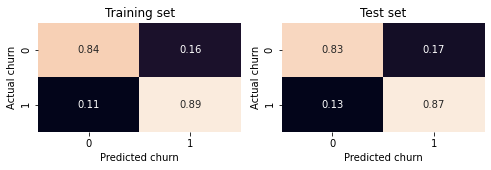

In [337]:
# Predicting churn on the train and test set
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

model_evaluation_plot(y_train,y_train_pred,y_test,y_test_pred)

#### Building a model on the data that has been treated with smote to counter class imbalance

In [202]:
# specify range of hyperparameters
param_grid = {
     'max_depth': [ 8, 10, 12],
     'max_features': ['sqrt', 30,40, 50, 60],
     'min_samples_leaf': range(50,200 ,50),     
     'class_weight' : ['balanced', {0:1, 1:16}] ,           
     'n_estimators': range(100,300,100)
}

# specify model
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['recall','precision', 'accuracy', 'f1']
rf2 = RandomForestClassifier(random_state=42, oob_score=True)

# set up GridSearchCV()
model_cv_rf2 = GridSearchCV(estimator=rf2,
                            param_grid=param_grid,
                            scoring=scoring,
                            refit='recall',
                            cv=folds,
                            verbose=3,
                            return_train_score=True)

model_cv_rf2.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END class_weight=balanced, max_depth=8, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.910, test=0.905) f1: (train=0.908, test=0.904) precision: (train=0.921, test=0.917) recall: (train=0.896, test=0.891) total time=   6.6s
[CV 2/5] END class_weight=balanced, max_depth=8, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.909, test=0.902) f1: (train=0.907, test=0.900) precision: (train=0.919, test=0.918) recall: (train=0.896, test=0.882) total time=   6.4s
[CV 3/5] END class_weight=balanced, max_depth=8, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.912, test=0.901) f1: (train=0.911, test=0.900) precision: (train=0.922, test=0.909) recall: (train=0.901, test=0.891) total time=   6.5s
[CV 4/5] END class_weight=balanced, max_depth=8, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.909, test=0.908) f1: (

[CV 2/5] END class_weight=balanced, max_depth=8, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.919, test=0.911) f1: (train=0.919, test=0.910) precision: (train=0.920, test=0.918) recall: (train=0.918, test=0.902) total time=  16.6s
[CV 3/5] END class_weight=balanced, max_depth=8, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.919, test=0.910) f1: (train=0.919, test=0.910) precision: (train=0.923, test=0.910) recall: (train=0.915, test=0.909) total time=  16.5s
[CV 4/5] END class_weight=balanced, max_depth=8, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.919, test=0.917) f1: (train=0.919, test=0.916) precision: (train=0.922, test=0.922) recall: (train=0.916, test=0.911) total time=  16.7s
[CV 5/5] END class_weight=balanced, max_depth=8, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.919, test=0.906) f1: (train=0.919, test=0.906) precision: (train=0.921, test=0.912) recall: (

[CV 4/5] END class_weight=balanced, max_depth=8, max_features=40, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.918, test=0.913) f1: (train=0.918, test=0.913) precision: (train=0.918, test=0.914) recall: (train=0.917, test=0.911) total time=  21.3s
[CV 5/5] END class_weight=balanced, max_depth=8, max_features=40, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.919, test=0.905) f1: (train=0.919, test=0.905) precision: (train=0.919, test=0.909) recall: (train=0.919, test=0.902) total time=  21.3s
[CV 1/5] END class_weight=balanced, max_depth=8, max_features=40, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.919, test=0.916) f1: (train=0.919, test=0.916) precision: (train=0.918, test=0.915) recall: (train=0.920, test=0.917) total time=  42.8s
[CV 2/5] END class_weight=balanced, max_depth=8, max_features=40, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.918, test=0.909) f1: (train=0.919, test=0.909) precision: (train=0.917, test=0.911) recall: (

[CV 1/5] END class_weight=balanced, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.918, test=0.912) f1: (train=0.918, test=0.913) precision: (train=0.916, test=0.910) recall: (train=0.920, test=0.916) total time=  53.3s
[CV 2/5] END class_weight=balanced, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.918, test=0.909) f1: (train=0.918, test=0.908) precision: (train=0.915, test=0.911) recall: (train=0.921, test=0.906) total time=  53.1s
[CV 3/5] END class_weight=balanced, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.919, test=0.909) f1: (train=0.919, test=0.910) precision: (train=0.919, test=0.905) recall: (train=0.918, test=0.914) total time=  53.3s
[CV 4/5] END class_weight=balanced, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.917, test=0.913) f1: (train=0.917, test=0.913) precision: (train=0.917, test=0.914) recall: (

[CV 3/5] END class_weight=balanced, max_depth=8, max_features=60, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.918, test=0.908) f1: (train=0.918, test=0.908) precision: (train=0.917, test=0.902) recall: (train=0.918, test=0.914) total time= 1.1min
[CV 4/5] END class_weight=balanced, max_depth=8, max_features=60, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.917, test=0.912) f1: (train=0.918, test=0.912) precision: (train=0.914, test=0.909) recall: (train=0.921, test=0.914) total time= 1.1min
[CV 5/5] END class_weight=balanced, max_depth=8, max_features=60, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.919, test=0.903) f1: (train=0.919, test=0.903) precision: (train=0.916, test=0.903) recall: (train=0.922, test=0.904) total time= 1.1min
[CV 1/5] END class_weight=balanced, max_depth=8, max_features=60, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.903, test=0.903) f1: (train=0.903, test=0.903) precision: (train=0.904, test=0.901) recall: 

[CV 5/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.920, test=0.906) f1: (train=0.919, test=0.905) precision: (train=0.928, test=0.917) recall: (train=0.911, test=0.893) total time=  14.3s
[CV 1/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.898, test=0.898) f1: (train=0.896, test=0.895) precision: (train=0.918, test=0.916) recall: (train=0.875, test=0.876) total time=   6.6s
[CV 2/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.901, test=0.899) f1: (train=0.899, test=0.896) precision: (train=0.919, test=0.921) recall: (train=0.880, test=0.872) total time=   6.6s
[CV 3/5] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.901, test=0.894) f1: (train=0.899, test=0.891) precision: (train=0.921, test=0

[CV 2/5] END class_weight=balanced, max_depth=10, max_features=30, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.908, test=0.899) f1: (train=0.907, test=0.897) precision: (train=0.916, test=0.911) recall: (train=0.898, test=0.884) total time=  17.9s
[CV 3/5] END class_weight=balanced, max_depth=10, max_features=30, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.908, test=0.899) f1: (train=0.907, test=0.898) precision: (train=0.919, test=0.909) recall: (train=0.896, test=0.887) total time=  17.7s
[CV 4/5] END class_weight=balanced, max_depth=10, max_features=30, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.907, test=0.904) f1: (train=0.906, test=0.903) precision: (train=0.918, test=0.918) recall: (train=0.893, test=0.888) total time=  18.0s
[CV 5/5] END class_weight=balanced, max_depth=10, max_features=30, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.909, test=0.898) f1: (train=0.908, test=0.896) precision: (train=0.917, test=0.908) r

[CV 4/5] END class_weight=balanced, max_depth=10, max_features=40, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.906, test=0.903) f1: (train=0.905, test=0.902) precision: (train=0.913, test=0.913) recall: (train=0.896, test=0.892) total time=  23.5s
[CV 5/5] END class_weight=balanced, max_depth=10, max_features=40, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.911, test=0.899) f1: (train=0.910, test=0.898) precision: (train=0.914, test=0.903) recall: (train=0.907, test=0.893) total time=  23.8s
[CV 1/5] END class_weight=balanced, max_depth=10, max_features=40, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.909, test=0.908) f1: (train=0.908, test=0.907) precision: (train=0.914, test=0.911) recall: (train=0.903, test=0.903) total time=  47.3s
[CV 2/5] END class_weight=balanced, max_depth=10, max_features=40, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.907, test=0.899) f1: (train=0.907, test=0.898) precision: (train=0.912, test=0.908) r

[CV 1/5] END class_weight=balanced, max_depth=10, max_features=50, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.905, test=0.906) f1: (train=0.905, test=0.905) precision: (train=0.909, test=0.907) recall: (train=0.901, test=0.904) total time=  58.9s
[CV 2/5] END class_weight=balanced, max_depth=10, max_features=50, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.906, test=0.898) f1: (train=0.906, test=0.897) precision: (train=0.909, test=0.906) recall: (train=0.903, test=0.888) total time=  58.7s
[CV 3/5] END class_weight=balanced, max_depth=10, max_features=50, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.906, test=0.897) f1: (train=0.905, test=0.896) precision: (train=0.912, test=0.900) recall: (train=0.898, test=0.893) total time=  58.7s
[CV 4/5] END class_weight=balanced, max_depth=10, max_features=50, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.904, test=0.901) f1: (train=0.904, test=0.900) precision: (train=0.909, test=0.907) r

[CV 3/5] END class_weight=balanced, max_depth=10, max_features=60, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.903, test=0.894) f1: (train=0.902, test=0.894) precision: (train=0.908, test=0.894) recall: (train=0.897, test=0.894) total time= 1.2min
[CV 4/5] END class_weight=balanced, max_depth=10, max_features=60, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.904, test=0.901) f1: (train=0.904, test=0.900) precision: (train=0.908, test=0.905) recall: (train=0.900, test=0.896) total time= 1.2min
[CV 5/5] END class_weight=balanced, max_depth=10, max_features=60, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.904, test=0.893) f1: (train=0.904, test=0.892) precision: (train=0.908, test=0.896) recall: (train=0.900, test=0.888) total time= 1.2min
[CV 1/5] END class_weight=balanced, max_depth=10, max_features=60, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.894, test=0.894) f1: (train=0.893, test=0.894) precision: (train=0.901, test=0.900) r

[CV 5/5] END class_weight=balanced, max_depth=12, max_features=sqrt, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.902, test=0.891) f1: (train=0.899, test=0.888) precision: (train=0.921, test=0.913) recall: (train=0.879, test=0.864) total time=  14.3s
[CV 1/5] END class_weight=balanced, max_depth=12, max_features=sqrt, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.890, test=0.890) f1: (train=0.886, test=0.887) precision: (train=0.915, test=0.916) recall: (train=0.859, test=0.860) total time=   6.7s
[CV 2/5] END class_weight=balanced, max_depth=12, max_features=sqrt, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.893, test=0.888) f1: (train=0.890, test=0.884) precision: (train=0.917, test=0.913) recall: (train=0.864, test=0.857) total time=   6.7s
[CV 3/5] END class_weight=balanced, max_depth=12, max_features=sqrt, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.890, test=0.882) f1: (train=0.886, test=0.878) precision: (train=0.918, test=

[CV 2/5] END class_weight=balanced, max_depth=12, max_features=30, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.898, test=0.893) f1: (train=0.896, test=0.891) precision: (train=0.913, test=0.910) recall: (train=0.879, test=0.873) total time=  18.1s
[CV 3/5] END class_weight=balanced, max_depth=12, max_features=30, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.895, test=0.888) f1: (train=0.893, test=0.886) precision: (train=0.912, test=0.906) recall: (train=0.874, test=0.867) total time=  18.0s
[CV 4/5] END class_weight=balanced, max_depth=12, max_features=30, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.897, test=0.898) f1: (train=0.895, test=0.895) precision: (train=0.913, test=0.917) recall: (train=0.877, test=0.875) total time=  18.1s
[CV 5/5] END class_weight=balanced, max_depth=12, max_features=30, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.898, test=0.889) f1: (train=0.896, test=0.886) precision: (train=0.914, test=0.907) r

[CV 4/5] END class_weight=balanced, max_depth=12, max_features=40, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.897, test=0.895) f1: (train=0.895, test=0.894) precision: (train=0.908, test=0.909) recall: (train=0.883, test=0.879) total time=  24.0s
[CV 5/5] END class_weight=balanced, max_depth=12, max_features=40, min_samples_leaf=150, n_estimators=100; accuracy: (train=0.898, test=0.888) f1: (train=0.897, test=0.887) precision: (train=0.911, test=0.902) recall: (train=0.883, test=0.872) total time=  24.0s
[CV 1/5] END class_weight=balanced, max_depth=12, max_features=40, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.897, test=0.895) f1: (train=0.895, test=0.894) precision: (train=0.909, test=0.907) recall: (train=0.882, test=0.881) total time=  48.3s
[CV 2/5] END class_weight=balanced, max_depth=12, max_features=40, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.897, test=0.890) f1: (train=0.895, test=0.888) precision: (train=0.907, test=0.904) r

[CV 1/5] END class_weight=balanced, max_depth=12, max_features=50, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.896, test=0.896) f1: (train=0.895, test=0.895) precision: (train=0.903, test=0.904) recall: (train=0.886, test=0.887) total time=  59.8s
[CV 2/5] END class_weight=balanced, max_depth=12, max_features=50, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.896, test=0.888) f1: (train=0.895, test=0.886) precision: (train=0.904, test=0.899) recall: (train=0.886, test=0.874) total time=  59.9s
[CV 3/5] END class_weight=balanced, max_depth=12, max_features=50, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.895, test=0.886) f1: (train=0.893, test=0.885) precision: (train=0.906, test=0.895) recall: (train=0.881, test=0.875) total time=  59.7s
[CV 4/5] END class_weight=balanced, max_depth=12, max_features=50, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.894, test=0.891) f1: (train=0.893, test=0.889) precision: (train=0.905, test=0.904) r

[CV 3/5] END class_weight=balanced, max_depth=12, max_features=60, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.894, test=0.887) f1: (train=0.893, test=0.886) precision: (train=0.904, test=0.894) recall: (train=0.882, test=0.877) total time= 1.2min
[CV 4/5] END class_weight=balanced, max_depth=12, max_features=60, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.895, test=0.892) f1: (train=0.894, test=0.890) precision: (train=0.903, test=0.902) recall: (train=0.885, test=0.879) total time= 1.2min
[CV 5/5] END class_weight=balanced, max_depth=12, max_features=60, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.896, test=0.887) f1: (train=0.895, test=0.886) precision: (train=0.904, test=0.894) recall: (train=0.887, test=0.878) total time= 1.2min
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.757, test=0.749) f1: (train=0.804, test=0.799) precision: (train=0.673, test=0.6

[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=sqrt, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.681, test=0.675) f1: (train=0.758, test=0.754) precision: (train=0.610, test=0.606) recall: (train=1.000, test=1.000) total time=  11.7s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=sqrt, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.678, test=0.681) f1: (train=0.756, test=0.758) precision: (train=0.608, test=0.610) recall: (train=1.000, test=0.999) total time=  11.8s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.802, test=0.799) f1: (train=0.835, test=0.832) precision: (train=0.717, test=0.715) recall: (train=0.999, test=0.996) total time=  16.4s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.808, test=0.810) f1: (train=0.839, test=0.840) precision: (train=0.

[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=30, min_samples_leaf=150, n_estimators=200; accuracy: (train=0.752, test=0.754) f1: (train=0.801, test=0.802) precision: (train=0.669, test=0.670) recall: (train=0.999, test=0.999) total time=  30.8s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=40, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.809, test=0.804) f1: (train=0.840, test=0.836) precision: (train=0.724, test=0.720) recall: (train=0.999, test=0.996) total time=  21.5s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=40, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.815, test=0.818) f1: (train=0.844, test=0.845) precision: (train=0.730, test=0.734) recall: (train=0.999, test=0.997) total time=  21.7s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=40, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.806, test=0.800) f1: (train=0.837, test=0.833) precision: (train=0.721, 

[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.810, test=0.804) f1: (train=0.840, test=0.836) precision: (train=0.725, test=0.720) recall: (train=0.999, test=0.995) total time=  26.8s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.816, test=0.818) f1: (train=0.844, test=0.846) precision: (train=0.731, test=0.735) recall: (train=0.999, test=0.996) total time=  26.8s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.808, test=0.801) f1: (train=0.839, test=0.834) precision: (train=0.723, test=0.717) recall: (train=0.999, test=0.994) total time=  26.8s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=50, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.805, test=0.796) f1: (train=0.837, test=0.830) precision: (train=0.720, t

[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=60, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.813, test=0.817) f1: (train=0.842, test=0.845) precision: (train=0.728, test=0.734) recall: (train=0.999, test=0.996) total time=  32.0s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=60, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.810, test=0.802) f1: (train=0.840, test=0.834) precision: (train=0.725, test=0.718) recall: (train=0.999, test=0.994) total time=  32.1s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=60, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.806, test=0.794) f1: (train=0.837, test=0.828) precision: (train=0.721, test=0.710) recall: (train=0.998, test=0.994) total time=  31.8s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=8, max_features=60, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.814, test=0.803) f1: (train=0.843, test=0.835) precision: (train=0.729, t

[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.796, test=0.794) f1: (train=0.831, test=0.829) precision: (train=0.711, test=0.709) recall: (train=1.000, test=0.999) total time=   7.1s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.792, test=0.779) f1: (train=0.828, test=0.819) precision: (train=0.706, test=0.694) recall: (train=1.000, test=0.998) total time=   7.1s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.794, test=0.790) f1: (train=0.829, test=0.826) precision: (train=0.708, test=0.704) recall: (train=1.000, test=0.999) total time=   7.1s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=sqrt, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.794, test=0.788) f1: (train=0.829, test=0.825) precision: (tr

[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.827, test=0.817) f1: (train=0.852, test=0.845) precision: (train=0.743, test=0.734) recall: (train=0.999, test=0.996) total time=  19.1s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=30, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.833, test=0.825) f1: (train=0.857, test=0.850) precision: (train=0.750, test=0.742) recall: (train=0.999, test=0.995) total time=  19.1s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=30, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.833, test=0.829) f1: (train=0.857, test=0.853) precision: (train=0.750, test=0.747) recall: (train=0.999, test=0.996) total time=  39.1s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=30, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.833, test=0.832) f1: (train=0.857, test=0.855) precision: (train=0.75

[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=40, min_samples_leaf=50, n_estimators=100; accuracy: (train=0.839, test=0.832) f1: (train=0.861, test=0.856) precision: (train=0.757, test=0.751) recall: (train=0.999, test=0.994) total time=  25.2s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=40, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.834, test=0.829) f1: (train=0.858, test=0.854) precision: (train=0.752, test=0.747) recall: (train=0.999, test=0.996) total time=  50.2s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=40, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.836, test=0.833) f1: (train=0.859, test=0.857) precision: (train=0.753, test=0.751) recall: (train=0.999, test=0.996) total time=  50.2s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=40, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.835, test=0.826) f1: (train=0.858, test=0.852) precision: (train=0.75

[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.835, test=0.831) f1: (train=0.858, test=0.855) precision: (train=0.753, test=0.749) recall: (train=0.999, test=0.996) total time= 1.0min
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.837, test=0.836) f1: (train=0.860, test=0.859) precision: (train=0.755, test=0.755) recall: (train=0.999, test=0.996) total time= 1.0min
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.837, test=0.829) f1: (train=0.860, test=0.853) precision: (train=0.755, test=0.747) recall: (train=0.999, test=0.995) total time= 1.0min
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=50, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.836, test=0.822) f1: (train=0.859, test=0.848) precision: (train=0.75

[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=60, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.835, test=0.835) f1: (train=0.858, test=0.858) precision: (train=0.753, test=0.753) recall: (train=0.998, test=0.996) total time= 1.4min
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=60, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.836, test=0.827) f1: (train=0.859, test=0.852) precision: (train=0.754, test=0.745) recall: (train=0.999, test=0.994) total time= 1.4min
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=60, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.835, test=0.821) f1: (train=0.858, test=0.847) precision: (train=0.753, test=0.739) recall: (train=0.998, test=0.993) total time= 1.4min
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=60, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.841, test=0.833) f1: (train=0.863, test=0.856) precision: (train=0.76

[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=sqrt, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.812, test=0.807) f1: (train=0.842, test=0.838) precision: (train=0.727, test=0.722) recall: (train=1.000, test=0.998) total time=  16.0s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=sqrt, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.811, test=0.799) f1: (train=0.841, test=0.832) precision: (train=0.726, test=0.714) recall: (train=1.000, test=0.998) total time=  16.2s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=sqrt, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.816, test=0.810) f1: (train=0.845, test=0.840) precision: (train=0.731, test=0.725) recall: (train=0.999, test=0.998) total time=  16.0s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=sqrt, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.742, test=0.735) f1: (train=0.795, test=0.790) precision: (t

[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=30, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.845, test=0.833) f1: (train=0.866, test=0.857) precision: (train=0.764, test=0.751) recall: (train=0.999, test=0.996) total time=  43.1s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=30, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.848, test=0.844) f1: (train=0.868, test=0.865) precision: (train=0.767, test=0.764) recall: (train=0.999, test=0.996) total time=  43.0s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=30, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.797, test=0.795) f1: (train=0.831, test=0.829) precision: (train=0.711, test=0.710) recall: (train=0.999, test=0.996) total time=  20.2s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=30, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.795, test=0.798) f1: (train=0.830, test=0.832) precision: (train=0.

[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=40, min_samples_leaf=50, n_estimators=200; accuracy: (train=0.850, test=0.844) f1: (train=0.869, test=0.864) precision: (train=0.770, test=0.764) recall: (train=0.998, test=0.994) total time=  56.6s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=40, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.804, test=0.800) f1: (train=0.836, test=0.833) precision: (train=0.719, test=0.716) recall: (train=0.998, test=0.996) total time=  26.6s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=40, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.804, test=0.808) f1: (train=0.836, test=0.838) precision: (train=0.719, test=0.723) recall: (train=0.998, test=0.998) total time=  26.6s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=40, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.804, test=0.800) f1: (train=0.836, test=0.833) precision: (train=0

[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=50, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.805, test=0.799) f1: (train=0.837, test=0.832) precision: (train=0.721, test=0.715) recall: (train=0.998, test=0.995) total time=  32.8s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=50, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.807, test=0.812) f1: (train=0.838, test=0.842) precision: (train=0.722, test=0.727) recall: (train=0.998, test=0.998) total time=  32.9s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=50, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.806, test=0.801) f1: (train=0.837, test=0.833) precision: (train=0.721, test=0.717) recall: (train=0.998, test=0.995) total time=  33.0s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=50, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.808, test=0.799) f1: (train=0.839, test=0.832) precision: (train=

[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=60, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.808, test=0.812) f1: (train=0.838, test=0.841) precision: (train=0.723, test=0.728) recall: (train=0.998, test=0.997) total time=  39.3s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=60, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.808, test=0.806) f1: (train=0.839, test=0.837) precision: (train=0.723, test=0.722) recall: (train=0.998, test=0.995) total time=  39.8s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=60, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.808, test=0.803) f1: (train=0.839, test=0.835) precision: (train=0.724, test=0.719) recall: (train=0.998, test=0.995) total time=  39.6s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=12, max_features=60, min_samples_leaf=100, n_estimators=100; accuracy: (train=0.811, test=0.806) f1: (train=0.841, test=0.836) precision: (train=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             param_grid={'class_weight': ['balanced', {0: 1, 1: 16}],
                         'max_depth': [8, 10, 12],
                         'max_features': ['sqrt', 30, 40, 50, 60],
                         'min_samples_leaf': range(50, 200, 50),
                         'n_estimators': range(100, 300, 100)},
             refit='recall', return_train_score=True,
             scoring=['recall', 'precision', 'accuracy', 'f1'], verbose=3)

In [203]:
cv_result_rf2 = pd.DataFrame(model_cv_rf2.cv_results_)
cv_result_rf2

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         6.637807      0.134743         0.089167        0.003124   
1        12.789843      0.332470         0.178920        0.043917   
2         6.037098      0.054001         0.087567        0.002391   
3        12.191061      0.240491         0.152975        0.004080   
4         5.799474      0.006022         0.085173        0.004621   
5        11.597313      0.058786         0.150803        0.003689   
6        16.626546      0.078126         0.084780        0.001888   
7        34.506619      1.076510         0.164556        0.013224   
8        16.776381      0.285766         0.084368        0.003060   
9        33.176076      1.276537         0.152787        0.007077   
10       15.426771      0.405532         0.079786        0.003148   
11       31.658599      1.475961         0.149060        0.005267   
12       21.386392      0.056981         0.081631        0.001925   
13       43.324866      1.016156         0.147209        0.004655   
14       20.465634      0.063122         0.079992        0.002518   
15       41.046536      0.099294         0.145418        0.007459   
16       19.675881      0.077112         0.077676        0.001928   
17       40.076787      0.799248         0.141608        0.001953   
18       26.577595      0.066151         0.081592        0.001951   
19       53.216425      0.070459         0.145066        0.005860   
20       25.429025      0.055438         0.079987        0.002530   
21       50.758623      0.046766         0.141592        0.005990   
22       24.391447      0.058919         0.079239        0.001620   
23       48.794706      0.125747         0.137616        0.001947   
24       31.960794      0.226686         0.081595        0.001964   
25       64.082648      0.763470         0.144010        0.003590   
26       30.392844      0.035295         0.083203        0.004656   
27       60.689398      0.072909         0.142139        0.004827   
28       29.405408      0.458602         0.076972        0.001540   
29       59.495423      0.104021         0.139621        0.001402   
30        7.128256      0.070092         0.098734        0.002530   
31       14.201133      0.037072         0.190906        0.002567   
32        6.639777      0.052881         0.093953        0.005158   
33       13.664489      0.592346         0.177326        0.027338   
34        6.380702      0.041762         0.088755        0.001663   
35       12.751198      0.164663         0.159568        0.003023   
36       19.227123      0.180596         0.093332        0.001848   
37       39.400711      1.167871         0.171744        0.012137   
38       17.884461      0.074373         0.090167        0.003830   
39       35.944666      0.103288         0.158177        0.002739   
40       16.951277      0.074535         0.085165        0.002335   
41       33.934278      0.205452         0.156380        0.003301   
42       25.184974      0.051183         0.092139        0.001201   
43       50.505682      0.072224         0.162960        0.003763   
44       23.592028      0.098515         0.088144        0.001342   
45       47.208694      0.047391         0.156793        0.002043   
46       22.364691      0.068702         0.084751        0.001415   
47       44.813558      0.038174         0.153405        0.002148   
48       31.447605      0.210655         0.091553        0.001938   
49       63.901846      1.340238         0.169339        0.010071   
50       29.318430      0.057566         0.085775        0.001546   
51       58.643192      0.126245         0.161369        0.005358   
52       27.790386      0.030131         0.085588        0.001713   
53       55.517505      0.151087         0.152989        0.004852   
54       37.507806      0.093999         0.090362        0.002051   
55       74.926601      0.086567         0.163173        0.004648   
56       35.020936      0.054521         0.087757        0.003642   
57 

In [204]:
# Best parameters selected through GridSearch
model_cv_rf2.best_params_

{'class_weight': {0: 1, 1: 16},
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 150,
 'n_estimators': 200}

In [206]:
# Best estimator
model_cv_rf2.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8,
                       max_features='sqrt', min_samples_leaf=150,
                       n_estimators=200, oob_score=True, random_state=42)

After performing hyperparameter tuning we best parameter obtained are:
- 'class_weight': {0: 1, 1: 16}
- 'max_depth': 8
- 'max_features': 'sqrt'
- 'min_samples_leaf': 150
- 'n_estimators': 200

In [338]:
# Creating the best rf model using smote
rf_best_smote = RandomForestClassifier(class_weight={0: 1, 1: 16},
                                       max_depth=8,
                                       max_features='sqrt',
                                       min_samples_leaf=150,
                                       n_estimators=200,
                                       oob_score=True,
                                       random_state=42)
print(f"Best estimator: {rf_best_smote}")

Best estimator: RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8,
                       max_features='sqrt', min_samples_leaf=150,
                       n_estimators=200, oob_score=True, random_state=42)


In [339]:
# Fitting the data on the best model
rf_best_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8,
                       max_features='sqrt', min_samples_leaf=150,
                       n_estimators=200, oob_score=True, random_state=42)


____________Recall/Sensitivity (Churn Prediction Accuracy) score____________
Train set: 1.0
Test set: 0.979

____________Specificity (Non Churn Prediction Accuracy) score____________
Train set: 0.403
Test set: 0.4

____________Precision score____________
Train set: 0.626
Test set: 0.117

____________F1 score____________
Train set: 0.77
Test set: 0.21

____________Accuracy score____________
Train set: 0.701
Test set: 0.444

____________Confusion Matrix____________


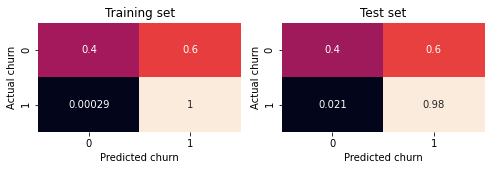

In [340]:
# Predicting churn on the train and test set
y_train_pred_smote = rf_best_smote.predict(X_train_smote)
y_test_pred = rf_best_smote.predict(X_test)

model_evaluation_plot(y_train_smote, y_train_pred_smote, y_test, y_test_pred)

With SMOTE, the model seems to overfit the data, as such using class weight to deal with class imbalance is a better option.

#### Running PCA for dimentionality reduction

Using the normal dataset, where no sampling methods have been used

In [341]:
pca = PCA(n_components=0.98, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Number of components present after PCA is {pca.n_components_}")

Number of components present after PCA is 69


In [342]:
pca.explained_variance_ratio_

array([0.14322781, 0.08941907, 0.05076061, 0.04775352, 0.0366574 ,
       0.03516917, 0.03150393, 0.02803552, 0.02568872, 0.02547167,
       0.02356547, 0.02274555, 0.02034878, 0.01934866, 0.0185662 ,
       0.0181837 , 0.01783051, 0.01732749, 0.01676999, 0.0164755 ,
       0.01541605, 0.01520344, 0.01452408, 0.0143805 , 0.01370943,
       0.01355992, 0.0133519 , 0.01172638, 0.01036878, 0.01012198,
       0.00968975, 0.00887997, 0.00807181, 0.00755302, 0.00611401,
       0.00582539, 0.00563314, 0.00527754, 0.00501925, 0.00470551,
       0.00464203, 0.00425675, 0.00394078, 0.00383303, 0.00367966,
       0.00362001, 0.00351289, 0.00325847, 0.0030716 , 0.00303703,
       0.00284632, 0.00269086, 0.00267257, 0.002654  , 0.00249102,
       0.00246064, 0.00242284, 0.00221492, 0.00216523, 0.00212469,
       0.00202012, 0.00188867, 0.00179389, 0.00171419, 0.00166121,
       0.00158323, 0.00154597, 0.00152431, 0.00145397])

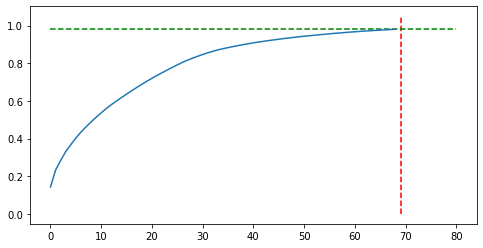

In [343]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=69, ymin=0, ymax=1.05, color='r', linestyles='dashed')
plt.hlines(y=0.98, xmin=0, xmax=80, color='g', linestyles='dashed')
plt.show()

In [217]:
# Creating a random forest using the principal components
param_grid={
    'max_depth': [8, 10, 12],
    'min_samples_split': [500, 750, 1000],
    'class_weight': ['balanced', {0: 1, 1: 16}],
    'n_estimators': range(100, 300, 100)
}

# specifying the model
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['recall', 'precision', 'accuracy', 'f1']
rf3 = RandomForestClassifier(random_state=42, oob_score=True)

# setting up GridSearchCV
model_cv_rf3 = GridSearchCV(estimator=rf3,
                            param_grid=param_grid,
                            scoring=scoring,
                            refit='recall',
                            cv=folds,
                            verbose=3,
                            return_train_score=True)
model_cv_rf3.fit(X_train_pca, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END class_weight=balanced, max_depth=8, min_samples_split=500, n_estimators=100; accuracy: (train=0.853, test=0.836) f1: (train=0.467, test=0.406) precision: (train=0.330, test=0.287) recall: (train=0.797, test=0.693) total time=   6.3s
[CV 2/5] END class_weight=balanced, max_depth=8, min_samples_split=500, n_estimators=100; accuracy: (train=0.856, test=0.850) f1: (train=0.470, test=0.459) precision: (train=0.334, test=0.324) recall: (train=0.791, test=0.785) total time=   6.1s
[CV 3/5] END class_weight=balanced, max_depth=8, min_samples_split=500, n_estimators=100; accuracy: (train=0.859, test=0.845) f1: (train=0.476, test=0.426) precision: (train=0.340, test=0.304) recall: (train=0.793, test=0.713) total time=   6.1s
[CV 4/5] END class_weight=balanced, max_depth=8, min_samples_split=500, n_estimators=100; accuracy: (train=0.860, test=0.861) f1: (train=0.482, test=0.450) precision: (train=0.344, test=0.330) recall:

[CV 4/5] END class_weight=balanced, max_depth=10, min_samples_split=500, n_estimators=100; accuracy: (train=0.859, test=0.859) f1: (train=0.482, test=0.447) precision: (train=0.342, test=0.327) recall: (train=0.813, test=0.706) total time=   6.3s
[CV 5/5] END class_weight=balanced, max_depth=10, min_samples_split=500, n_estimators=100; accuracy: (train=0.853, test=0.845) f1: (train=0.467, test=0.450) precision: (train=0.330, test=0.315) recall: (train=0.800, test=0.785) total time=   6.5s
[CV 1/5] END class_weight=balanced, max_depth=10, min_samples_split=500, n_estimators=200; accuracy: (train=0.856, test=0.840) f1: (train=0.473, test=0.413) precision: (train=0.336, test=0.294) recall: (train=0.801, test=0.696) total time=  12.9s
[CV 2/5] END class_weight=balanced, max_depth=10, min_samples_split=500, n_estimators=200; accuracy: (train=0.857, test=0.849) f1: (train=0.473, test=0.455) precision: (train=0.336, test=0.322) recall: (train=0.796, test=0.779) total time=  12.5s
[CV 3/5] END

[CV 3/5] END class_weight=balanced, max_depth=12, min_samples_split=500, n_estimators=200; accuracy: (train=0.858, test=0.844) f1: (train=0.477, test=0.427) precision: (train=0.339, test=0.303) recall: (train=0.802, test=0.719) total time=  13.4s
[CV 4/5] END class_weight=balanced, max_depth=12, min_samples_split=500, n_estimators=200; accuracy: (train=0.854, test=0.852) f1: (train=0.475, test=0.438) precision: (train=0.335, test=0.316) recall: (train=0.816, test=0.713) total time=  13.5s
[CV 5/5] END class_weight=balanced, max_depth=12, min_samples_split=500, n_estimators=200; accuracy: (train=0.855, test=0.850) f1: (train=0.471, test=0.458) precision: (train=0.334, test=0.322) recall: (train=0.800, test=0.788) total time=  13.5s
[CV 1/5] END class_weight=balanced, max_depth=12, min_samples_split=750, n_estimators=100; accuracy: (train=0.847, test=0.836) f1: (train=0.458, test=0.409) precision: (train=0.321, test=0.289) recall: (train=0.799, test=0.703) total time=   6.1s
[CV 2/5] END

[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=8, min_samples_split=750, n_estimators=100; accuracy: (train=0.804, test=0.798) f1: (train=0.413, test=0.380) precision: (train=0.272, test=0.252) recall: (train=0.854, test=0.766) total time=   5.5s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=8, min_samples_split=750, n_estimators=100; accuracy: (train=0.805, test=0.798) f1: (train=0.415, test=0.402) precision: (train=0.274, test=0.264) recall: (train=0.858, test=0.842) total time=   5.4s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=8, min_samples_split=750, n_estimators=100; accuracy: (train=0.810, test=0.800) f1: (train=0.425, test=0.393) precision: (train=0.281, test=0.260) recall: (train=0.868, test=0.802) total time=   5.5s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=8, min_samples_split=750, n_estimators=100; accuracy: (train=0.804, test=0.803) f1: (train=0.413, test=0.388) precision: (train=0.272, test=0.259) recall: (train=0.853, test=0.772) total time=   5

[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=10, min_samples_split=750, n_estimators=100; accuracy: (train=0.805, test=0.802) f1: (train=0.417, test=0.388) precision: (train=0.275, test=0.259) recall: (train=0.864, test=0.776) total time=   5.8s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=10, min_samples_split=750, n_estimators=100; accuracy: (train=0.808, test=0.795) f1: (train=0.420, test=0.395) precision: (train=0.278, test=0.259) recall: (train=0.862, test=0.831) total time=   5.8s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=10, min_samples_split=750, n_estimators=200; accuracy: (train=0.807, test=0.798) f1: (train=0.418, test=0.377) precision: (train=0.276, test=0.251) recall: (train=0.857, test=0.756) total time=  11.7s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=10, min_samples_split=750, n_estimators=200; accuracy: (train=0.810, test=0.802) f1: (train=0.424, test=0.409) precision: (train=0.281, test=0.270) recall: (train=0.868, test=0.848) total time=

[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=12, min_samples_split=750, n_estimators=200; accuracy: (train=0.809, test=0.802) f1: (train=0.423, test=0.411) precision: (train=0.279, test=0.271) recall: (train=0.867, test=0.855) total time=  12.3s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=12, min_samples_split=750, n_estimators=200; accuracy: (train=0.813, test=0.799) f1: (train=0.429, test=0.388) precision: (train=0.285, test=0.257) recall: (train=0.866, test=0.785) total time=  12.4s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=12, min_samples_split=750, n_estimators=200; accuracy: (train=0.808, test=0.806) f1: (train=0.420, test=0.391) precision: (train=0.278, test=0.262) recall: (train=0.863, test=0.772) total time=  11.9s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=12, min_samples_split=750, n_estimators=200; accuracy: (train=0.809, test=0.796) f1: (train=0.422, test=0.394) precision: (train=0.280, test=0.259) recall: (train=0.863, test=0.825) total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             param_grid={'class_weight': ['balanced', {0: 1, 1: 16}],
                         'max_depth': [8, 10, 12],
                         'min_samples_split': [500, 750, 1000],
                         'n_estimators': range(100, 300, 100)},
             refit='recall', return_train_score=True,
             scoring=['recall', 'precision', 'accuracy', 'f1'], verbose=3)

In [218]:
# Best parameters selected through GridSearch
model_cv_rf3.best_params_

{'class_weight': {0: 1, 1: 16},
 'max_depth': 8,
 'min_samples_split': 1000,
 'n_estimators': 100}

In [219]:
# Best estimator
model_cv_rf3.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8,
                       min_samples_split=1000, oob_score=True, random_state=42)

After performing hyperparameter tuning we best parameter obtained are:
- 'class_weight': {0: 1, 1: 16}
- 'max_depth': 8
- 'min_samples_split': 1000
- 'n_estimators': 100

In [344]:
rf_best_pca = RandomForestClassifier(class_weight={0: 1, 1: 16},
                                     max_depth=8,
                                     min_samples_split=1000,
                                     n_estimators=100,
                                     oob_score=True,
                                     random_state=42)
print(f"Best estimator: {rf_best_pca}")

Best estimator: RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8,
                       min_samples_split=1000, oob_score=True, random_state=42)


In [345]:
# Fitting the data on the model
rf_best_pca.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8,
                       min_samples_split=1000, oob_score=True, random_state=42)


____________Recall/Sensitivity (Churn Prediction Accuracy) score____________
Train set: 0.859
Test set: 0.802

____________Specificity (Non Churn Prediction Accuracy) score____________
Train set: 0.79
Test set: 0.798

____________Precision score____________
Train set: 0.264
Test set: 0.245

____________F1 score____________
Train set: 0.404
Test set: 0.375

____________Accuracy score____________
Train set: 0.795
Test set: 0.798

____________Confusion Matrix____________


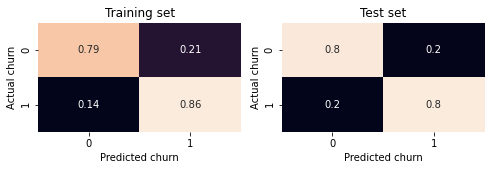

In [346]:
# Predicting churn on the train and test set
y_train_pred_pca = rf_best_pca.predict(X_train_pca)
y_test_pred = rf_best_pca.predict(X_test_pca)

model_evaluation_plot(y_train, y_train_pred_pca, y_test, y_test_pred)

#### Running PCA on the X_train_smote and X_test_smote for which class imbalance has been handled using smote

In [347]:
pca_smote = PCA(n_components=0.98, random_state=42)
X_train_pca_smote = pca_smote.fit_transform(X_train_smote)
X_test_pca_smote = pca_smote.transform(X_test)

print(f"Number of components present after PCA is {pca_smote.n_components_}")

Number of components present after PCA is 66


In [348]:
pca_smote.explained_variance_ratio_

array([0.19163815, 0.1033655 , 0.05802408, 0.05085178, 0.04241886,
       0.04141953, 0.03105574, 0.02885239, 0.02716904, 0.02189749,
       0.01994135, 0.01902609, 0.01823096, 0.01664589, 0.01643895,
       0.01541968, 0.01512455, 0.01407578, 0.01376926, 0.01292769,
       0.0122662 , 0.01197923, 0.01159985, 0.01078198, 0.01072167,
       0.01037525, 0.01005293, 0.00965803, 0.00890316, 0.00862903,
       0.00787893, 0.00714208, 0.00684709, 0.00619882, 0.00550547,
       0.00536326, 0.0046783 , 0.00443757, 0.00420353, 0.0040687 ,
       0.00384377, 0.00366866, 0.00347958, 0.00334004, 0.00297883,
       0.00292979, 0.00278647, 0.00266024, 0.00259219, 0.00255381,
       0.00243001, 0.00237436, 0.00229411, 0.00224693, 0.00217321,
       0.00202528, 0.00188487, 0.00179848, 0.00176226, 0.00173178,
       0.00168802, 0.00158383, 0.00152075, 0.0014852 , 0.00144259,
       0.00139991])

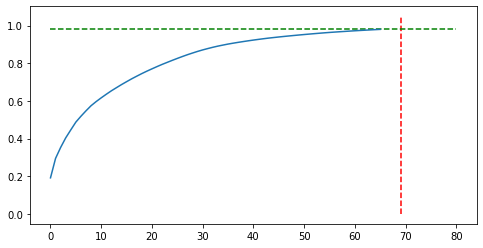

In [349]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca_smote.explained_variance_ratio_))
plt.vlines(x=69, ymin=0, ymax=1.05, color='r', linestyles='dashed')
plt.hlines(y=0.98, xmin=0, xmax=80, color='g', linestyles='dashed')
plt.show()

In [236]:
# Creating a random forest using the principal components
param_grid={
    'max_depth': [8, 10, 12],
    'min_samples_split': [500, 750, 1000],
    'class_weight': ['balanced', {0: 1, 1: 16}],
    'n_estimators': range(100, 300, 100)
}

# specifying the model
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['recall', 'precision', 'accuracy', 'f1']
rf4 = RandomForestClassifier(random_state=42, oob_score=True)

# setting up GridSearchCV
model_cv_rf4 = GridSearchCV(estimator=rf4,
                            param_grid=param_grid,
                            scoring=scoring,
                            refit='recall',
                            cv=folds,
                            verbose=3,
                            return_train_score=True)
model_cv_rf4.fit(X_train_pca_smote, y_train_smote)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END class_weight=balanced, max_depth=8, min_samples_split=500, n_estimators=100; accuracy: (train=0.861, test=0.852) f1: (train=0.856, test=0.847) precision: (train=0.883, test=0.875) recall: (train=0.831, test=0.821) total time=  12.0s
[CV 2/5] END class_weight=balanced, max_depth=8, min_samples_split=500, n_estimators=100; accuracy: (train=0.863, test=0.862) f1: (train=0.860, test=0.858) precision: (train=0.884, test=0.882) recall: (train=0.836, test=0.836) total time=  12.0s
[CV 3/5] END class_weight=balanced, max_depth=8, min_samples_split=500, n_estimators=100; accuracy: (train=0.862, test=0.852) f1: (train=0.857, test=0.847) precision: (train=0.888, test=0.872) recall: (train=0.828, test=0.824) total time=  11.9s
[CV 4/5] END class_weight=balanced, max_depth=8, min_samples_split=500, n_estimators=100; accuracy: (train=0.860, test=0.855) f1: (train=0.856, test=0.850) precision: (train=0.885, test=0.884) recall:

[CV 4/5] END class_weight=balanced, max_depth=10, min_samples_split=500, n_estimators=100; accuracy: (train=0.867, test=0.862) f1: (train=0.862, test=0.856) precision: (train=0.896, test=0.895) recall: (train=0.831, test=0.821) total time=  13.2s
[CV 5/5] END class_weight=balanced, max_depth=10, min_samples_split=500, n_estimators=100; accuracy: (train=0.868, test=0.853) f1: (train=0.863, test=0.848) precision: (train=0.896, test=0.881) recall: (train=0.832, test=0.817) total time=  13.3s
[CV 1/5] END class_weight=balanced, max_depth=10, min_samples_split=500, n_estimators=200; accuracy: (train=0.864, test=0.854) f1: (train=0.860, test=0.849) precision: (train=0.891, test=0.879) recall: (train=0.831, test=0.820) total time=  26.5s
[CV 2/5] END class_weight=balanced, max_depth=10, min_samples_split=500, n_estimators=200; accuracy: (train=0.865, test=0.862) f1: (train=0.860, test=0.857) precision: (train=0.891, test=0.887) recall: (train=0.831, test=0.829) total time=  27.0s
[CV 3/5] END

[CV 3/5] END class_weight=balanced, max_depth=12, min_samples_split=500, n_estimators=200; accuracy: (train=0.869, test=0.857) f1: (train=0.863, test=0.852) precision: (train=0.902, test=0.884) recall: (train=0.827, test=0.823) total time=  28.5s
[CV 4/5] END class_weight=balanced, max_depth=12, min_samples_split=500, n_estimators=200; accuracy: (train=0.870, test=0.862) f1: (train=0.864, test=0.856) precision: (train=0.902, test=0.897) recall: (train=0.830, test=0.818) total time=  28.3s
[CV 5/5] END class_weight=balanced, max_depth=12, min_samples_split=500, n_estimators=200; accuracy: (train=0.867, test=0.854) f1: (train=0.862, test=0.848) precision: (train=0.898, test=0.884) recall: (train=0.828, test=0.815) total time=  28.5s
[CV 1/5] END class_weight=balanced, max_depth=12, min_samples_split=750, n_estimators=100; accuracy: (train=0.859, test=0.852) f1: (train=0.853, test=0.845) precision: (train=0.894, test=0.889) recall: (train=0.816, test=0.804) total time=  13.3s
[CV 2/5] END

[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=8, min_samples_split=750, n_estimators=100; accuracy: (train=0.501, test=0.500) f1: (train=0.667, test=0.667) precision: (train=0.500, test=0.500) recall: (train=1.000, test=1.000) total time=  12.7s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=8, min_samples_split=750, n_estimators=100; accuracy: (train=0.504, test=0.502) f1: (train=0.668, test=0.668) precision: (train=0.502, test=0.501) recall: (train=1.000, test=1.000) total time=  12.5s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=8, min_samples_split=750, n_estimators=100; accuracy: (train=0.501, test=0.501) f1: (train=0.667, test=0.667) precision: (train=0.501, test=0.501) recall: (train=1.000, test=1.000) total time=  12.7s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=8, min_samples_split=750, n_estimators=100; accuracy: (train=0.507, test=0.508) f1: (train=0.670, test=0.670) precision: (train=0.503, test=0.504) recall: (train=1.000, test=1.000) total time=  12

[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=10, min_samples_split=750, n_estimators=100; accuracy: (train=0.513, test=0.513) f1: (train=0.672, test=0.672) precision: (train=0.506, test=0.506) recall: (train=1.000, test=1.000) total time=  14.5s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=10, min_samples_split=750, n_estimators=100; accuracy: (train=0.505, test=0.503) f1: (train=0.669, test=0.668) precision: (train=0.503, test=0.502) recall: (train=1.000, test=1.000) total time=  14.5s
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=10, min_samples_split=750, n_estimators=200; accuracy: (train=0.503, test=0.502) f1: (train=0.668, test=0.668) precision: (train=0.501, test=0.501) recall: (train=1.000, test=1.000) total time=  28.9s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=10, min_samples_split=750, n_estimators=200; accuracy: (train=0.507, test=0.504) f1: (train=0.670, test=0.668) precision: (train=0.504, test=0.502) recall: (train=1.000, test=1.000) total time=

[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=12, min_samples_split=750, n_estimators=200; accuracy: (train=0.512, test=0.509) f1: (train=0.672, test=0.671) precision: (train=0.506, test=0.505) recall: (train=1.000, test=1.000) total time=  41.4s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=12, min_samples_split=750, n_estimators=200; accuracy: (train=0.509, test=0.512) f1: (train=0.671, test=0.672) precision: (train=0.505, test=0.506) recall: (train=1.000, test=1.000) total time=  41.4s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=12, min_samples_split=750, n_estimators=200; accuracy: (train=0.518, test=0.517) f1: (train=0.675, test=0.674) precision: (train=0.509, test=0.509) recall: (train=1.000, test=1.000) total time=  42.1s
[CV 5/5] END class_weight={0: 1, 1: 16}, max_depth=12, min_samples_split=750, n_estimators=200; accuracy: (train=0.511, test=0.509) f1: (train=0.672, test=0.671) precision: (train=0.506, test=0.505) recall: (train=1.000, test=1.000) total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             param_grid={'class_weight': ['balanced', {0: 1, 1: 16}],
                         'max_depth': [8, 10, 12],
                         'min_samples_split': [500, 750, 1000],
                         'n_estimators': range(100, 300, 100)},
             refit='recall', return_train_score=True,
             scoring=['recall', 'precision', 'accuracy', 'f1'], verbose=3)

In [237]:
# Best parameters selected through GridSearch
model_cv_rf4.best_params_

{'class_weight': {0: 1, 1: 16},
 'max_depth': 8,
 'min_samples_split': 500,
 'n_estimators': 100}

In [238]:
# Best estimator
model_cv_rf4.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8,
                       min_samples_split=500, oob_score=True, random_state=42)

After performing hyperparameter tuning we best parameter obtained are:
- 'class_weight': {0: 1, 1: 16}
- 'max_depth': 8
- 'min_samples_split': 500
- 'n_estimators': 100

In [350]:
rf_best_pca_smote = RandomForestClassifier(class_weight={0: 1, 1: 16},
                                           max_depth=8,
                                           min_samples_split=500,
                                           n_estimators=100,
                                           oob_score=True,
                                           random_state=42)
print(f"Best estimator: {rf_best_pca_smote}")

Best estimator: RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8,
                       min_samples_split=500, oob_score=True, random_state=42)


In [351]:
# Fitting the data on the model
rf_best_pca_smote.fit(X_train_pca_smote, y_train_smote)

RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8,
                       min_samples_split=500, oob_score=True, random_state=42)


____________Recall/Sensitivity (Churn Prediction Accuracy) score____________
Train set: 1.0
Test set: 0.998

____________Specificity (Non Churn Prediction Accuracy) score____________
Train set: 0.025
Test set: 0.022

____________Precision score____________
Train set: 0.506
Test set: 0.077

____________F1 score____________
Train set: 0.672
Test set: 0.143

____________Accuracy score____________
Train set: 0.513
Test set: 0.096

____________Confusion Matrix____________


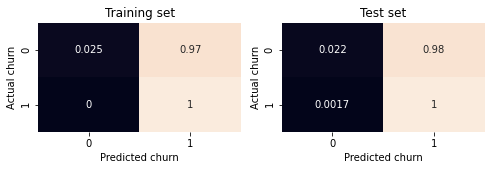

In [353]:
# Predicting churn on the train and test set
y_train_pred_pca_smote = rf_best_pca_smote.predict(X_train_pca_smote)
y_test_pred = rf_best_pca_smote.predict(X_test_pca_smote)

model_evaluation_plot(y_train_smote, y_train_pred_pca_smote, y_test, y_test_pred)

As observed before using smote seems to cause the model to overfit

### Final Model:

Of the four models created rf_best, plain Random Forest without PCA and with class weights assigned to deal with class imbalance performs the best.

#### Taking rf_best as the final model

In [355]:
rf_best

RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8, max_features=40,
                       min_samples_leaf=150, n_estimators=200, oob_score=True,
                       random_state=42)

In [354]:
final_model = RandomForestClassifier(class_weight={0: 1, 1: 16},
                                     max_depth=8,
                                     max_features=40,
                                     min_samples_leaf=150,
                                     n_estimators=200,
                                     oob_score=True,
                                     random_state=42)
print(f"Final model:\n{final_model}")

Final model:
RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8, max_features=40,
                       min_samples_leaf=150, n_estimators=200, oob_score=True,
                       random_state=42)


In [356]:
# Fitting the final model on the data
final_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=8, max_features=40,
                       min_samples_leaf=150, n_estimators=200, oob_score=True,
                       random_state=42)


____________Recall/Sensitivity (Churn Prediction Accuracy) score____________
Train set: 0.892
Test set: 0.873

____________Specificity (Non Churn Prediction Accuracy) score____________
Train set: 0.836
Test set: 0.835

____________Precision score____________
Train set: 0.324
Test set: 0.301

____________F1 score____________
Train set: 0.475
Test set: 0.448

____________Accuracy score____________
Train set: 0.841
Test set: 0.838

____________Confusion Matrix____________


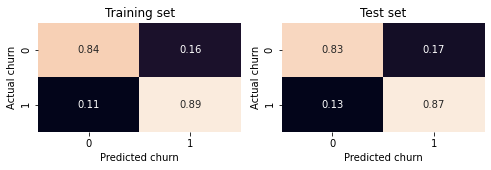

In [357]:
# Predicting churn on the train and test set
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

model_evaluation_plot(y_train,y_train_pred,y_test,y_test_pred)

### Identifying the factors which play an important role in predicting churn

In [380]:
# Storing all the column/feature names into a variable
feature_names = list(X_train.columns)
# Getting the feature importance from the final_model
feature_importance = final_model.feature_importances_
# Creating a dataframe to hold the values
feature_coefs = pd.DataFrame(feature_importance, columns={'coefs'}, index=feature_names)

In [381]:
feature_coefs.reset_index(inplace=True)

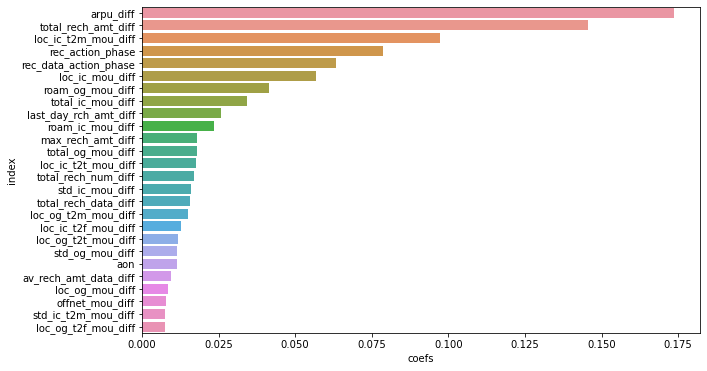

In [389]:
# Plotting the feature importance using a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='coefs', y='index', data=feature_coefs[feature_coefs['coefs'] > 0.005].sort_values(by='coefs', ascending=False))
plt.show()

### Conclusion:

- The prediction model gives more importance for the reduction of Type II Error (missing to identify potential churn behaviour) because loosing high value customers can cause significant decline in the company revenue.

- Although Type I Error (incorrectly identifing non-churn behaviour as churn) is relatively high, giving competitive offers to them will help company in longer run to generate more revenue as current focus is only on high value customers.

- We managed to get a Recall of 0.892 on the Train set and 0.873 on the Test set, which is pretty good.

  ##### Below are the imprtant variables which are important Churn indicators:-

- A sudden reduction in total recharge amount(total_rech_amnt_x) or average revenue per user(arpu_x) generated from the user indicates a tendency of churn. This might due to unsatisfactory service quality or attractive offer from competitors, customer feedback needs to be collected and competitive offers need to be given based on customer value.

- A sudden drop in the Local Incoming calls from other operators(loc_ic_t2m_mou) would suggest that Customers already have started to use a different connection for their calls, and is about to stop using this connection. Such customers should be identified and given attractive offers so that they are tempted to continue using this connection.

- The derived recharge recency feature for voice and data (rec_action_phase, rec_data_action_phase) shows that customers are likely to churn if they do not charge for a period of 30-40 days. The recharge recency of customers needs to be regularly monitored and customer needs to be approached to get the customer feedback and concerns.

- Old customers are less likely to churn since they have developed trust over the service provider. New customers with Age on the network (aon)less than 2 years are more likely to churn and offering attractive packages at the initial months will develop loyalty and are like to continue with the service. 

- An decreased usage of roaming service(roam_og_mou_x, roam_ic_mou_x) leads to higher churn rate. This can be due to higher roaming charges and suggesting attractive roaming packages may reduce churn